### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left; padding: 0px; border-bottom: 3px solid #294B8E">🏭 Industry</p>

<a id="1.2"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Content</div>

<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"> <span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li>
      <li><span><a href="#Loading-libraries" data-toc-modified-id="Loading-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</ span>Loading Libraries</a></span></li>
      <li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li>
     <li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp; &nbsp;</span>Exploratory data analysis</a></span></li>
     <li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5"><span class="toc-item-num">5&nbsp; &nbsp;</ span>Data Preprocessing</a></span></li>
     <li><span><a href="#Prepare-sample-to-train-models" data-toc-modified-id="Prepare-sample-to-train-models-6"><span class="toc- item-num">6&nbsp;&nbsp;</span>Prepare sample to train models</a></span></li>
     <li><span><a href="#Standardization" data-toc-modified-id="Standardization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Standardization</a></span></li>
     <li><span><a href="#Training-models" data-toc-modified-id="Training-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</ span>Training models</a></span></li>
     <li><span><a href="#Best-model-testing" data-toc-modified-id="Best-model-testing-9"><span class="toc-item-num">9&nbsp; &nbsp;</span>Best-model-testing</a></span></li>
     <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li>

<a id="Data-Description"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Data Description</div>

<ul>
<li>data_arc_new.csv - electrode data;</li>
<li>data_bulk_new.csv - data on the supply of bulk materials (volume);</li>
<li>data_bulk_time_new.csv - data on the supply of bulk materials (time);</li>
<li>data_gas_new.csv — data on alloy gas purge;</li>
<li>data_temp_new.csv - temperature measurement results;</li>
<li>data_wire_new.csv - data on wire materials (volume);</li>
<li>data_wire_time_new.csv - data about wire materials (time).</li>
</ul>

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">


In order to optimize production costs, the metallurgical plant Tak Temper Steel LLC decided to reduce electricity consumption at the stage of steel processing.
    
    
<br> The goal of the project: to build a model that predicts the temperature of steel.
</div>

<a id="Loading-libraries"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Loading libraries</div>

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import lightgbm as lgmb
from math import sqrt
from sklearn import tree, metrics
from tabulate import tabulate
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

<a id="EDA"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> EDA</div>

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Electrode Data

In [2]:
# Electrode Data
try:
    data_arc_new = pd.read_csv('data_arc_new.csv')
except:
    data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')

In [3]:
data_arc_new.head(5)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [4]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [6]:
data_arc_new.duplicated().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     No gaps or duplicates were found in the data. It is necessary to change the data type of the columns "Start of arc heating" and "End of arc heating", also change the name of the columns. An outlier (-715.479924) was found in the "Reactive power" column, let's delete it.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Bulk material feed data (volume)

In [7]:
try:
    data_bulk_new = pd.read_csv('data_bulk_new.csv')
except:
    data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')

In [8]:
data_bulk_new.head(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [9]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [10]:
data_bulk_new.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [11]:
data_bulk_new.duplicated().sum()

0

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Bulk materials feeding data (time)

In [12]:
try:
    data_bulk_time_new = pd.read_csv('data_bulk_time_new.csv')
except:
    data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')

In [13]:
data_bulk_time_new.head(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [14]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [15]:
data_bulk_time_new.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [16]:
data_bulk_time_new.duplicated().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     In the data_bulk_new and data_bulk_time_new tables, a similar structure is observed, gaps were also found, apparently certain bulk materials were not used in the manufacture. No duplicates were found in the data. You need to change the data type of the columns "Bulk 4", "Bulk 12", "Bulk 14" and "Bulk 15" and change the name of the columns in the tables.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Alloy gas purge data

In [17]:
try:
    data_gas_new = pd.read_csv('data_gas_new.csv')
except:
    data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')

In [18]:
data_gas_new.head(5)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [19]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [20]:
data_gas_new.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [21]:
data_gas_new.duplicated().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     No gaps or duplicates were found in the data_gas_new table. You need to change the name of the columns in the table.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Temperature measurement results

In [22]:
try:
    data_temp_new = pd.read_csv('data_temp_new.csv')
except:
    data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')

In [23]:
data_temp_new.head(5)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [24]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [25]:
data_temp_new.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [26]:
data_temp_new.duplicated().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     No duplicates were found in the data_temp_new table, but gaps were found in the Temperature column. You need to change the name of the columns in the table.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Wire materials data (volume)

In [27]:
try:
    data_wire_new = pd.read_csv('data_wire_new.csv')
except:
    data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')

In [28]:
data_wire_new.head(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [30]:
data_wire_new.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [31]:
data_wire_new.duplicated().sum()

0

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Wire material data (time)

In [32]:
try:
    data_wire_time_new = pd.read_csv('data_wire_time_new.csv')
except:
    data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')

In [33]:
data_wire_time_new.head(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [35]:
data_wire_time_new.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [36]:
data_wire_time_new.duplicated().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     No duplicates were found in the data_wire_new and data_wire_time_new tables, but gaps were found. You need to change the name of the columns in the table. The table is similar in structure.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>✍ Conclusion</b>
<ul>
<li>Column gaps detected.</li>
<li>No duplicates found in data.</li>
<li>The tables have a different number of unique key batch numbers. This may mean that the data for the batch may have been lost or that a manufacturing step has not been performed on it.</li>
<li>We need to change the data type and column names.</li>
</ul></div>

<a id="Exploratory-data-analysis"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Exploratory data analysis</div>

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Electrode Data

In [37]:
data_arc_new = data_arc_new.rename(columns={"Начало нагрева дугой": "Start_of_arc_heating",
                                             "Конец нагрева дугой": "End_of_arc_heating",
                                            "Активная мощность": "Active_power",
                                            "Реактивная мощность": "Reactive_power",})

In [38]:
#change column type
data_arc_new['Start_of_arc_heating'] = pd.to_datetime(data_arc_new['Start_of_arc_heating'])
data_arc_new['End_of_arc_heating'] = pd.to_datetime(data_arc_new['End_of_arc_heating'])

In [39]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Start_of_arc_heating  14876 non-null  datetime64[ns]
 2   End_of_arc_heating    14876 non-null  datetime64[ns]
 3   Active_power          14876 non-null  float64       
 4   Reactive_power        14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [40]:
#number of games
len(data_arc_new['key'].unique())

3214

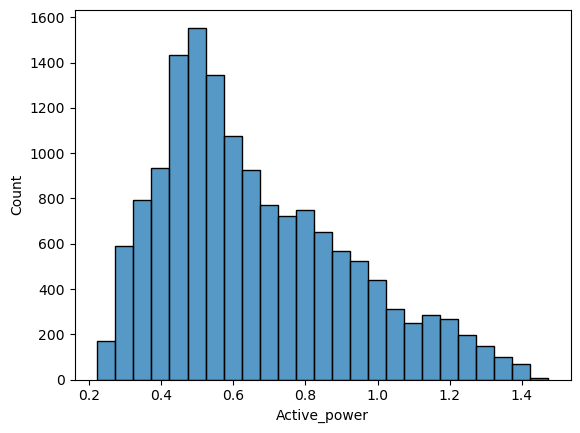

In [41]:
#active power distribution
sns.histplot(data_arc_new['Active_power'], binwidth=0.05);

In [42]:
#remove the big negative outlier
data_arc_new = data_arc_new[data_arc_new['Reactive_power'] != -715.479924]

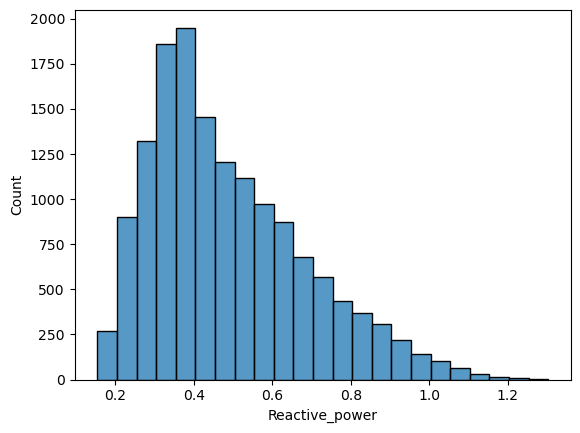

In [43]:
#reactive power distribution
sns.histplot(data_arc_new['Reactive_power'], binwidth=0.05);

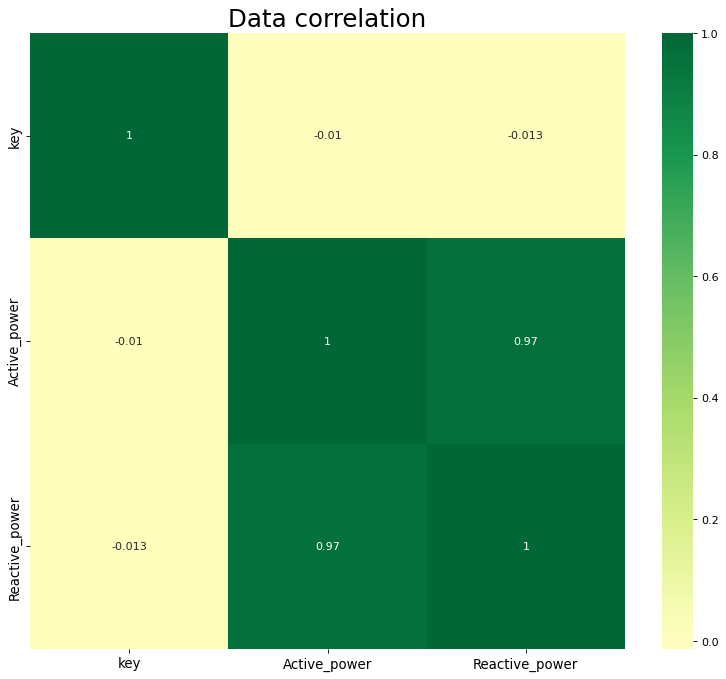

In [44]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_arc_new.corr(), 
            xticklabels=data_arc_new.corr().columns,
            yticklabels=data_arc_new.corr().columns,
            cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Data correlation', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    In the data_arc_new table, the column names and data type have been changed. Removed negative outlier. From the correlation diagram, there is a high correlation between active and reactive power.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Bulk material feed data (volume)

In [45]:
data_bulk_new = data_bulk_new.rename(columns={"Bulk 1": "Bulk_1",
                                              "Bulk 2": "Bulk_2",
                                              "Bulk 3": "Bulk_3",
                                              "Bulk 4": "Bulk_4",
                                              "Bulk 5": "Bulk_5",
                                              "Bulk 6": "Bulk_6",
                                              "Bulk 7": "Bulk_7",
                                              "Bulk 8": "Bulk_8",
                                              "Bulk 9": "Bulk_9",
                                              "Bulk 10": "Bulk_10",
                                              "Bulk 11": "Bulk_11",
                                              "Bulk 12": "Bulk_12",
                                              "Bulk 13": "Bulk_13",
                                              "Bulk 14": "Bulk_14",
                                              "Bulk 15": "Bulk_15"})

In [46]:
#let's see which columns have the most gaps
data_bulk_new.isnull().mean().sort_values(ascending=False)

Bulk_8     0.999680
Bulk_13    0.994247
Bulk_9     0.993928
Bulk_2     0.992969
Bulk_7     0.992010
Bulk_5     0.975391
Bulk_10    0.943752
Bulk_11    0.943432
Bulk_1     0.919463
Bulk_6     0.815916
Bulk_4     0.675935
Bulk_3     0.585171
Bulk_15    0.281560
Bulk_12    0.217002
Bulk_14    0.103228
key        0.000000
dtype: float64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Let's add an all_bulk column that shows the sum of all bulks with more gaps

In [47]:
data_bulk_new['all_bulk'] = data_bulk_new['Bulk_1'] + data_bulk_new['Bulk_2'] + data_bulk_new['Bulk_5'] + data_bulk_new['Bulk_7'] + data_bulk_new['Bulk_8'] + data_bulk_new['Bulk_9'] + data_bulk_new['Bulk_10'] + data_bulk_new['Bulk_11'] + data_bulk_new['Bulk_13']


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     The columns "Bulk_8", "Bulk_13", "Bulk_9", "Bulk_2", "Bulk_7", "Bulk_5", "Bulk_10", "Bulk_11", "Bulk_1" have more than 90% gaps. It follows that these bulk materials are the least used and these columns can be deleted.

In [48]:
data_bulk_new = data_bulk_new[['key','Bulk_14', 'Bulk_12', 'Bulk_15', 'Bulk_3','Bulk_4','Bulk_6', 
                              'all_bulk']]

In [49]:
#number of games
len(data_bulk_new['key'].unique())

3129

In [50]:
data_bulk_new.describe()

,key,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6,all_bulk
count,3129.000000,2806.000000,2450.000000,2248.000000,1298.000000,1014.000000,576.000000,0.0
mean,1624.383509,170.284747,260.471020,160.513345,113.879045,104.394477,118.925347,NaN
std,933.337642,65.868652,120.649269,51.765319,75.483494,48.184126,72.057776,NaN
min,1.000000,16.000000,53.000000,1.000000,6.000000,12.000000,17.000000,NaN
25%,816.000000,119.000000,204.000000,105.000000,58.000000,72.000000,69.750000,NaN
50%,1622.000000,151.000000,208.000000,160.000000,97.500000,102.000000,100.000000,NaN
75%,2431.000000,205.750000,316.000000,205.000000,152.000000,133.000000,157.000000,NaN
max,3241.000000,636.000000,1849.000000,405.000000,454.000000,281.000000,503.000000,NaN


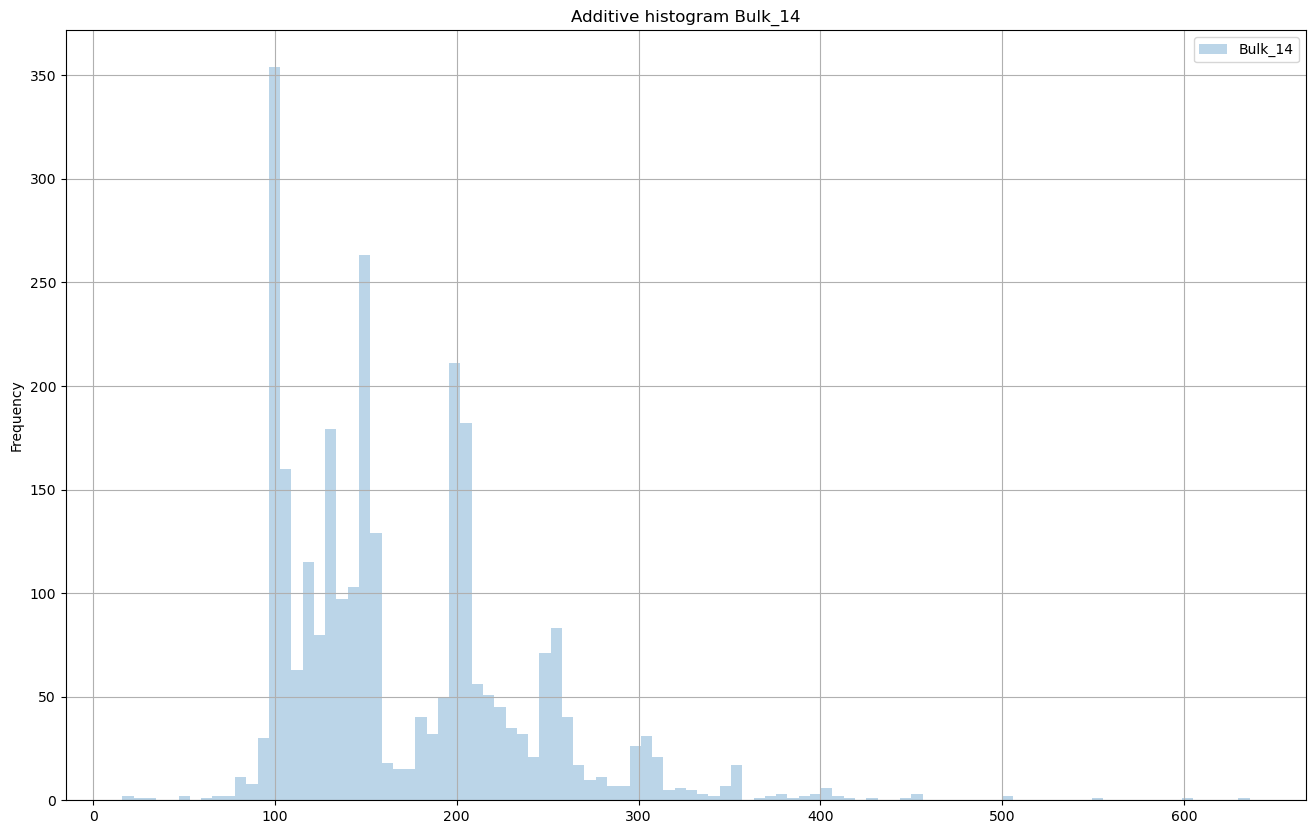

In [51]:
data_bulk_new['Bulk_14'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Bulk_14')
plt.legend(loc='upper right');
plt.ylabel('Frequency')
plt.title('Additive histogram Bulk_14');

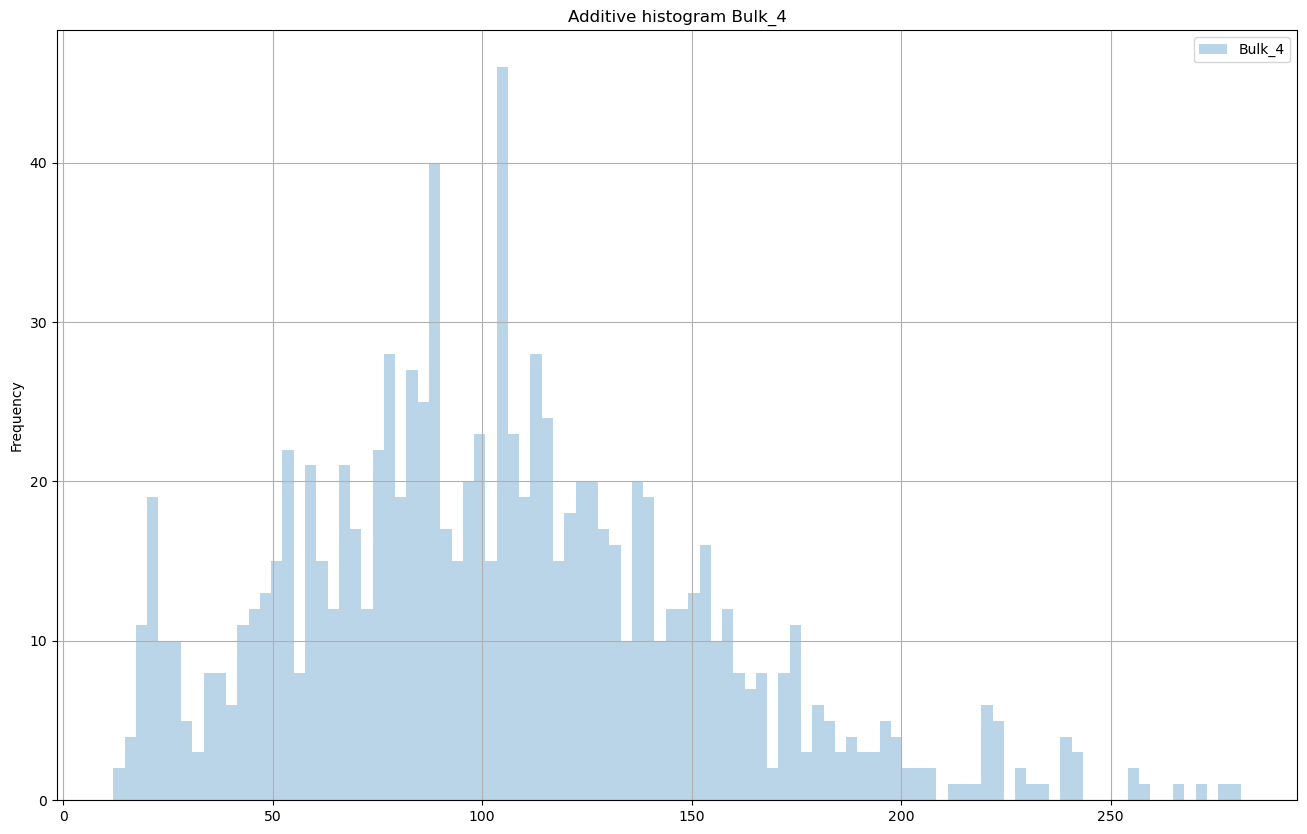

In [52]:
data_bulk_new['Bulk_4'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Bulk_4')
plt.legend(loc='upper right');
plt.ylabel('Frequency')
plt.title('Additive histogram Bulk_4');

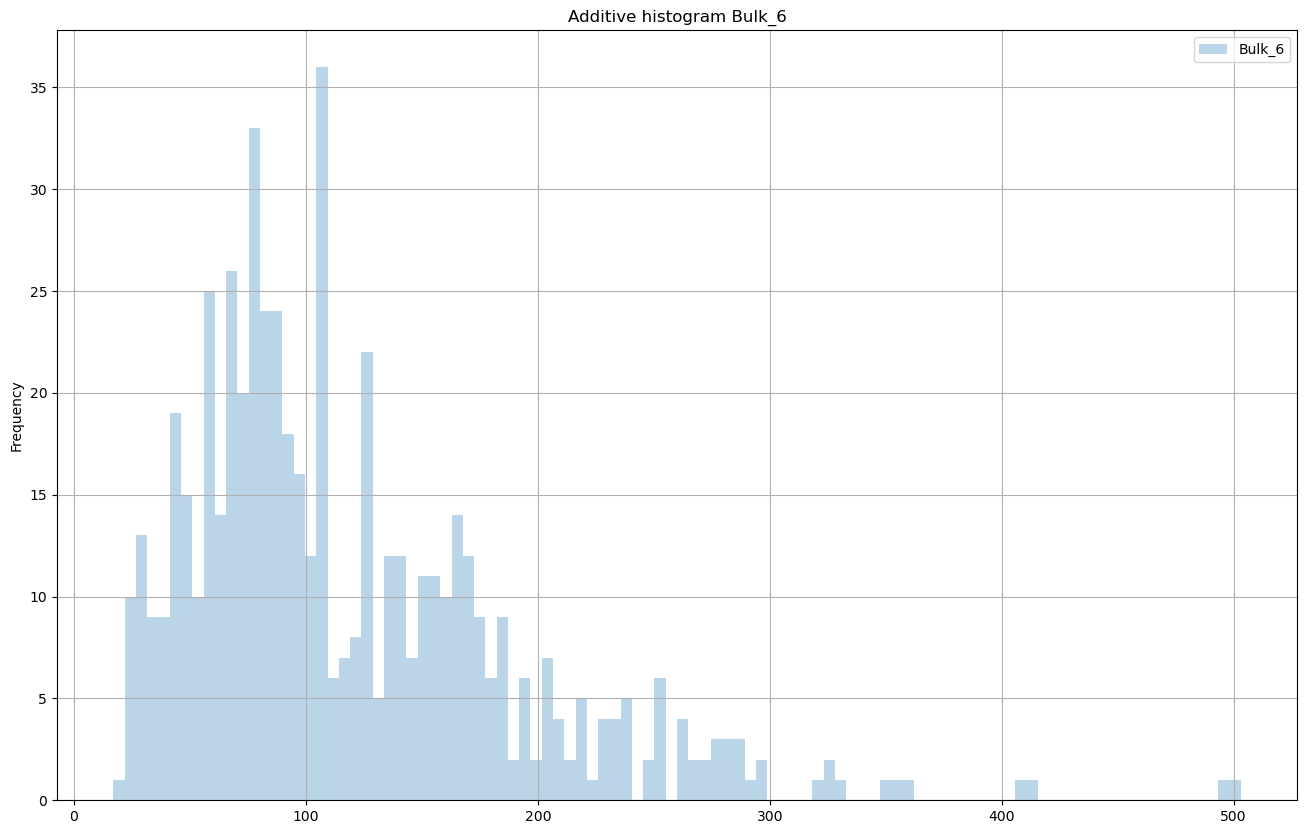

In [53]:
data_bulk_new['Bulk_6'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Bulk_6')
plt.legend(loc='upper right');
plt.ylabel('Frequency')
plt.title('Additive histogram Bulk_6');

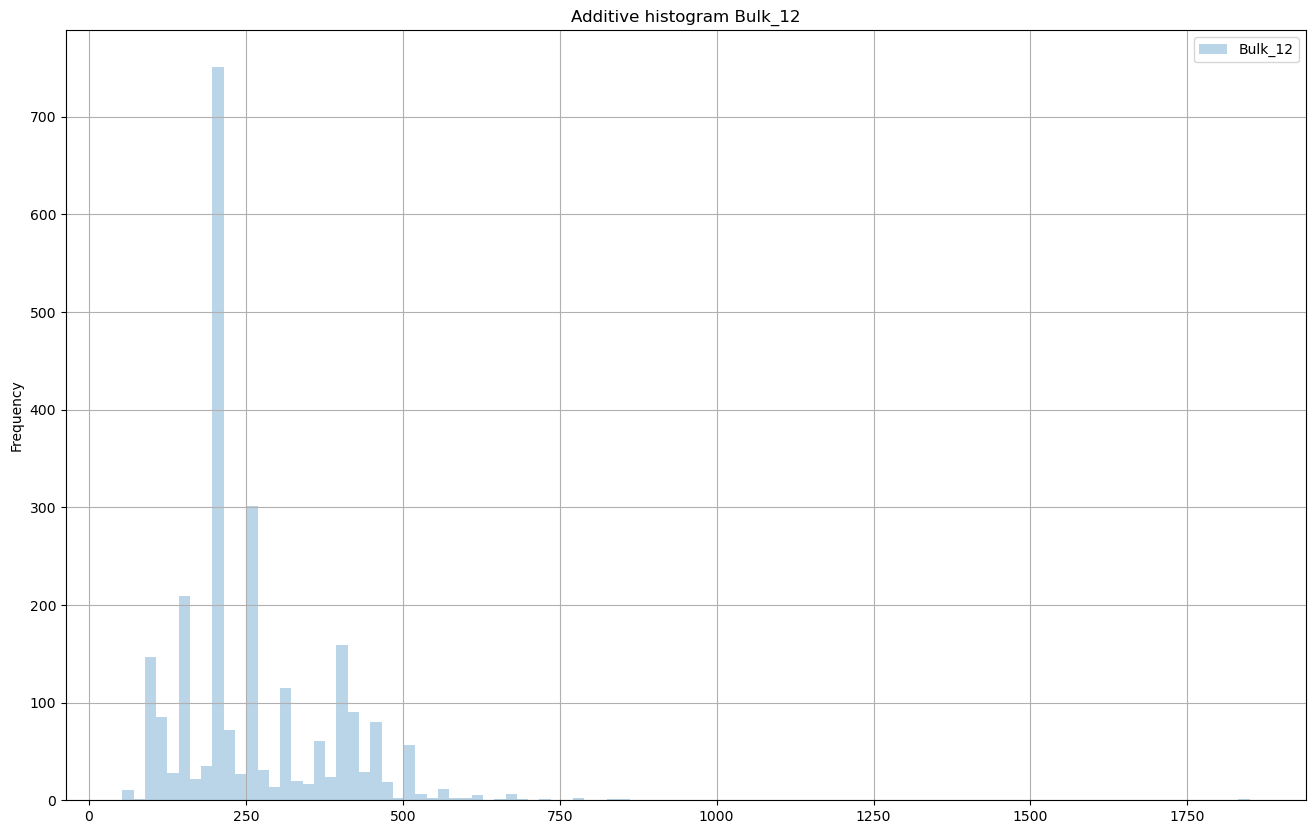

In [54]:
data_bulk_new['Bulk_12'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Bulk_12')
plt.legend(loc='upper right');
plt.ylabel('Frequency')
plt.title('Additive histogram Bulk_12');

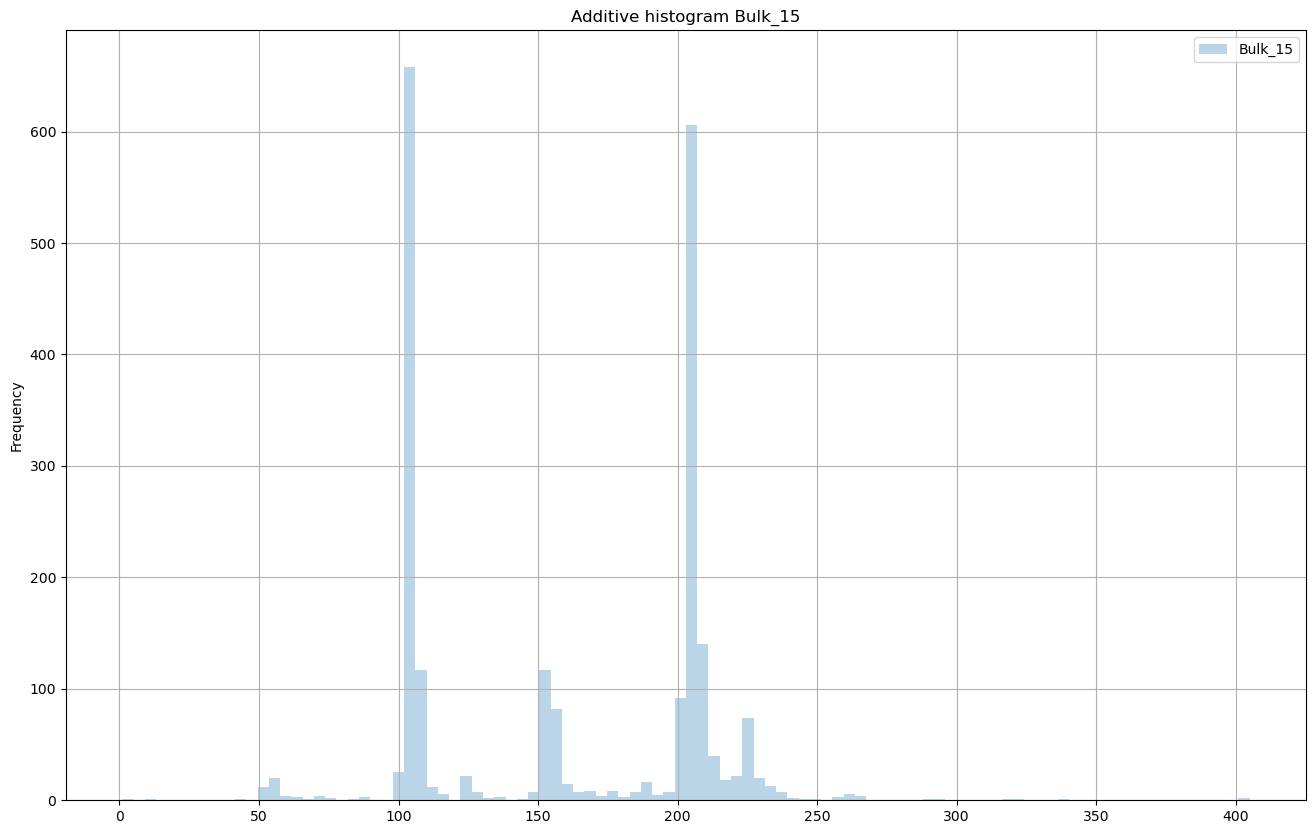

In [55]:
data_bulk_new['Bulk_15'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Bulk_15')
plt.legend(loc='upper right');
plt.ylabel('Frequency')
plt.title('Additive histogram Bulk_15');

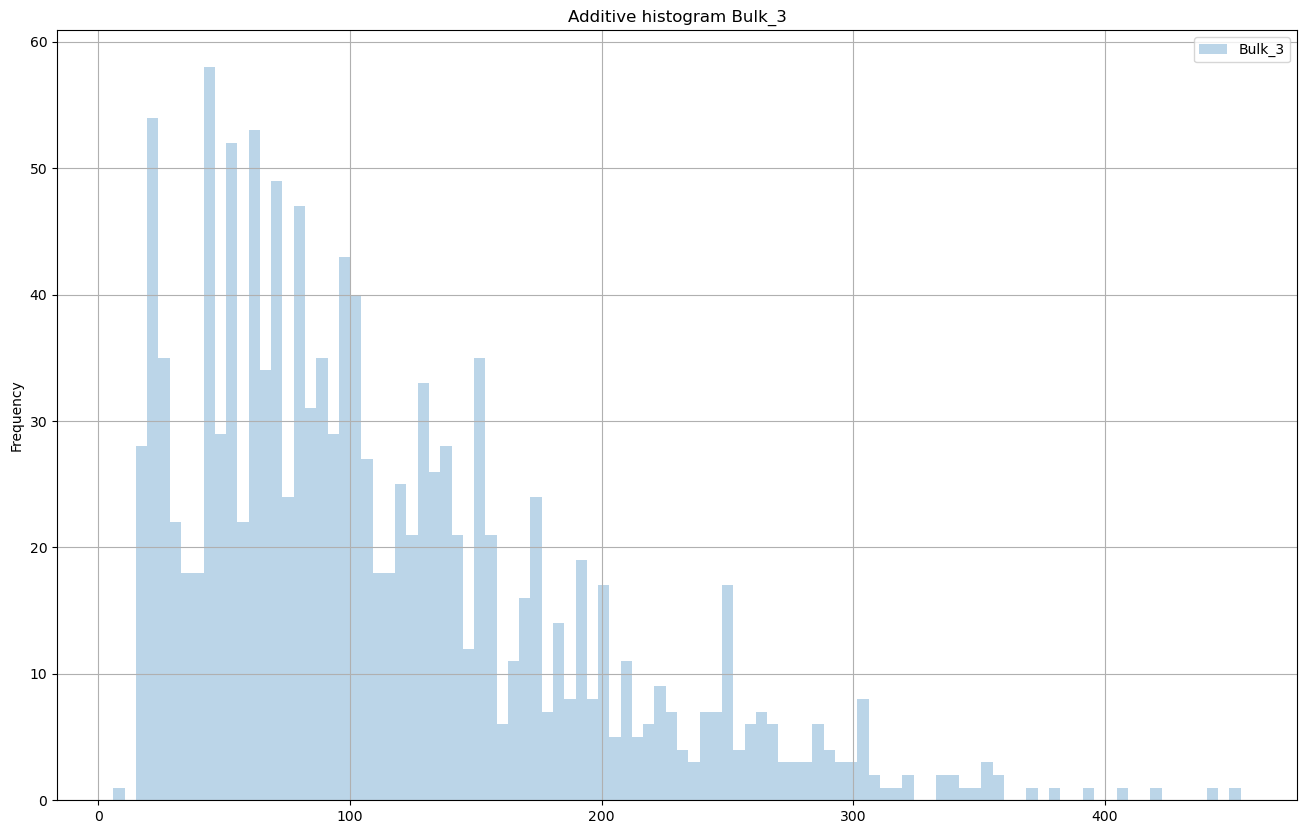

In [56]:
data_bulk_new['Bulk_3'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Bulk_3')
plt.legend(loc='upper right');
plt.ylabel('Frequency')
plt.title('Additive histogram Bulk_3');

In [57]:
data_bulk_new['Bulk_3'].describe()

count    1298.000000
mean      113.879045
std        75.483494
min         6.000000
25%        58.000000
50%        97.500000
75%       152.000000
max       454.000000
Name: Bulk_3, dtype: float64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     It can be seen from the distribution graphs that the Bulk_12 additive is used in large quantities. Bulk_14 is most often used, but in smaller quantities compared to Bulk_12 additive.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Bulk materials feeding data (time)

In [58]:
data_bulk_time_new = data_bulk_time_new.rename(columns={"Bulk 1": "Bulk_1",
                                              "Bulk 2": "Bulk_2",
                                              "Bulk 3": "Bulk_3",
                                              "Bulk 4": "Bulk_4",
                                              "Bulk 5": "Bulk_5",
                                              "Bulk 6": "Bulk_6",
                                              "Bulk 7": "Bulk_7",
                                              "Bulk 8": "Bulk_8",
                                              "Bulk 9": "Bulk_9",
                                              "Bulk 10": "Bulk_10",
                                              "Bulk 11": "Bulk_11",
                                              "Bulk 12": "Bulk_12",
                                              "Bulk 13": "Bulk_13",
                                              "Bulk 14": "Bulk_14",
                                              "Bulk 15": "Bulk_15"})

In [59]:
data_bulk_time_new = data_bulk_time_new[['key','Bulk_14', 'Bulk_12', 'Bulk_15', 'Bulk_3','Bulk_4','Bulk_6']]
data_bulk_time_new

,key,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6
0,1,2019-05-03 11:14:50,2019-05-03 11:24:31,2019-05-03 11:10:43,NaN,2019-05-03 11:28:48,NaN
1,2,2019-05-03 11:48:37,2019-05-03 11:53:30,2019-05-03 11:44:39,NaN,2019-05-03 11:36:50,NaN
2,3,2019-05-03 12:21:01,2019-05-03 12:27:13,2019-05-03 12:16:16,NaN,2019-05-03 12:32:39,NaN
3,4,2019-05-03 12:51:11,2019-05-03 12:58:00,2019-05-03 12:46:36,NaN,2019-05-03 12:43:22,NaN
4,5,2019-05-03 13:34:12,2019-05-03 13:30:47,2019-05-03 13:30:47,NaN,2019-05-03 13:30:47,NaN
...,...,...,...,...,...,...,...
3124,3237,2019-09-06 11:45:22,2019-09-06 11:49:45,2019-09-06 11:40:06,2019-09-06 11:54:15,NaN,NaN
3125,3238,2019-09-06 12:31:49,2019-09-06 12:18:35,2019-09-06 12:26:52,2019-09-06 12:26:52,NaN,NaN
3126,3239,2019-09-06 14:58:15,2019-09-06 15:01:44,2019-09-06 14:48:06,NaN,NaN,2019-09-06 15:06:00
3127,3240,2019-09-06 16:07:29,NaN,2019-09-06 16:01:34,NaN,NaN,2019-09-06 16:24:28


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
In the data_bulk_new and data_bulk_time_new tables, the names of the columns have been changed, the columns "Bulk_8", "Bulk_13", "Bulk_9", "Bulk_2", "Bulk_7", "Bulk_5", "Bulk_10", "Bulk_11", "Bulk_1" have been deleted. are uninformative.

In [60]:
#number of parties
len(data_bulk_time_new['key'].unique())

3129

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Alloy gas purge data

In [61]:
data_gas_new = data_gas_new.rename(columns={'Газ 1':'Gas_1'})

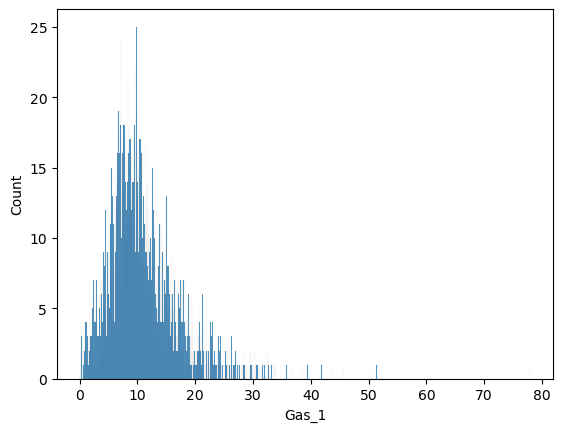

In [62]:
#gas purge distribution
sns.histplot(data_gas_new['Gas_1'], binwidth=0.05);

In [63]:
#number of parties
len(data_gas_new['key'].unique())

3239

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Temperature measurement results

In [64]:
data_temp_new = data_temp_new.rename(columns={'Время замера':'Sample_time',
                                              'Температура':'Temperature'})

In [65]:
data_temp_new['Sample_time'] = pd.to_datetime(data_temp_new['Sample_time'])
 

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
The steel temperature is the target feature, so we will delete the rows where the target feature is NaN.

In [66]:
data_temp_new = data_temp_new.dropna()

In [67]:
data_temp_new['Temperature'] = data_temp_new['Temperature'].astype('int')

In [68]:
#how many times the temperature was measured in batches
data_temp_new['key'].value_counts()

2108    17
1513    16
1689    16
322     14
46      14
        ..
2747     1
2748     1
2749     1
2750     1
3241     1
Name: key, Length: 3216, dtype: int64

In [69]:
#number of parties
len(data_temp_new['key'].unique())

3216

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Wire materials data (volume)

In [70]:
data_wire_new = data_wire_new.rename(columns={"Wire 1": "Wire_1",
                                              "Wire 2": "Wire_2",
                                              "Wire 3": "Wire_3",
                                              "Wire 4": "Wire_4",
                                              "Wire 5": "Wire_5",
                                              "Wire 6": "Wire_6",
                                              "Wire 7": "Wire_7",
                                              "Wire 8": "Wire_8",
                                              "Wire 9": "Wire_9"})

In [71]:
#see which columns have the most gaps
data_wire_new.isnull().mean().sort_values(ascending=False)

Wire_5    0.999675
Wire_7    0.996430
Wire_4    0.995456
Wire_8    0.993833
Wire_9    0.990587
Wire_3    0.979552
Wire_6    0.976306
Wire_2    0.649789
Wire_1    0.008439
key       0.000000
dtype: float64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Let's add the all_wire column, which shows the sum of all wire fillers with a large number of gaps.

In [72]:
data_wire_new['all_wire'] = data_wire_new['Wire_3'] + data_wire_new['Wire_4'] + data_wire_new['Wire_5'] + data_wire_new['Wire_6'] + data_wire_new['Wire_7'] + data_wire_new['Wire_8'] + data_wire_new['Wire_9']

In [73]:
data_wire_new = data_wire_new[['key','Wire_1', 'Wire_2', 'all_wire']]
data_wire_new 

,key,Wire_1,Wire_2,all_wire
0,1,60.059998,NaN,NaN
1,2,96.052315,NaN,NaN
2,3,91.160157,NaN,NaN
3,4,89.063515,NaN,NaN
4,5,89.238236,9.11456,NaN
...,...,...,...,...
3076,3237,38.088959,NaN,NaN
3077,3238,56.128799,NaN,NaN
3078,3239,143.357761,NaN,NaN
3079,3240,34.070400,NaN,NaN


In [74]:
data_wire_new.describe()

,key,Wire_1,Wire_2,all_wire
count,3081.000000,3055.000000,1079.000000,0.0
mean,1623.426485,100.895853,50.577323,NaN
std,932.996726,42.012518,39.320216,NaN
min,1.000000,1.918800,0.030160,NaN
25%,823.000000,72.115684,20.193680,NaN
50%,1619.000000,100.158234,40.142956,NaN
75%,2434.000000,126.060483,70.227558,NaN
max,3241.000000,330.314424,282.780152,NaN


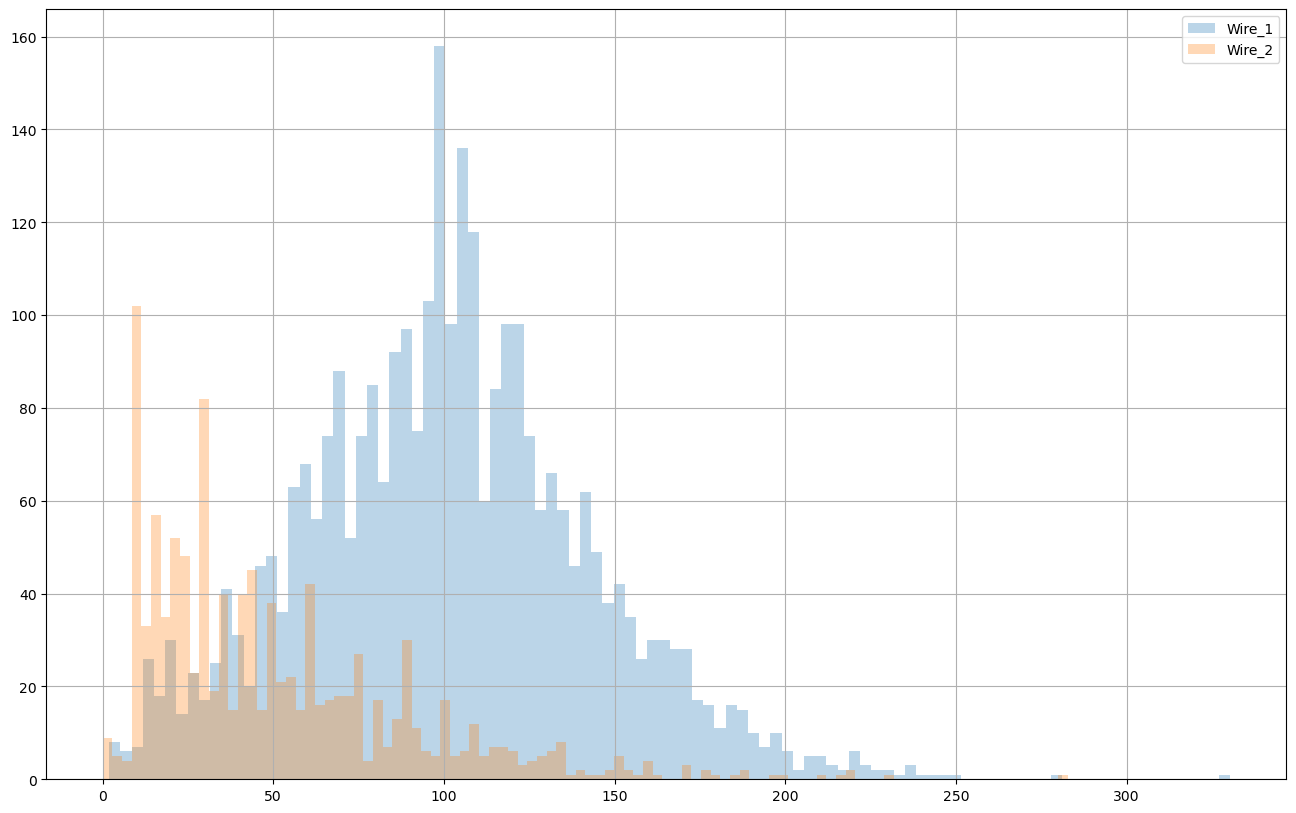

In [75]:
data_wire_new['Wire_1'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Wire_1')
data_wire_new['Wire_2'].hist(bins=100, figsize=(16,10), alpha=0.3, label='Wire_2')
plt.legend(loc='upper right');

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    It can be seen from the distribution graph that Wire_1 is used in large quantities.

In [76]:
#number of games
len(data_wire_new['key'].unique())

3081

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Wire material data (time)

In [77]:
data_wire_time_new = data_wire_time_new.rename(columns={"Wire 1": "Wire_1",
                                              "Wire 2": "Wire_2",
                                              "Wire 3": "Wire_3",
                                              "Wire 4": "Wire_4",
                                              "Wire 5": "Wire_5",
                                              "Wire 6": "Wire_6",
                                              "Wire 7": "Wire_7",
                                              "Wire 8": "Wire_8",
                                              "Wire 9": "Wire_9"})

In [78]:
#let's see which columns have the most gaps
data_wire_time_new.isnull().mean().sort_values(ascending=False)

Wire_5    0.999675
Wire_7    0.996430
Wire_4    0.995456
Wire_8    0.993833
Wire_9    0.990587
Wire_3    0.979552
Wire_6    0.976306
Wire_2    0.649789
Wire_1    0.008439
key       0.000000
dtype: float64

In [79]:
data_wire_time_new = data_wire_time_new[['key','Wire_1', 'Wire_2']]
data_wire_time_new 

,key,Wire_1,Wire_2
0,1,2019-05-03 11:06:19,NaN
1,2,2019-05-03 11:36:50,NaN
2,3,2019-05-03 12:11:46,NaN
3,4,2019-05-03 12:43:22,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34
...,...,...,...
3076,3237,2019-09-06 11:33:38,NaN
3077,3238,2019-09-06 12:18:35,NaN
3078,3239,2019-09-06 14:36:11,NaN
3079,3240,2019-09-06 15:33:55,NaN


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    In the data_wire_new and data_wire_time_new tables, the names of the columns have been changed, the columns "Wire_3", "Wire_4", "Wire_5", "Wire_6", "Wire_7", "Wire_8", "Wire_9" have been deleted. are uninformative and contain 90% gaps.

In [80]:
#number of games
len(data_wire_time_new['key'].unique())

3081

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📍Consider the first batch number

In [81]:
data_arc_new[data_arc_new['key'] == 1]

,key,Start_of_arc_heating,End_of_arc_heating,Active_power,Reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [82]:
data_bulk_new[data_bulk_new['key'] == 1]

,key,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6,all_bulk
0,1,150.0,206.0,154.0,NaN,43.0,NaN,NaN


In [83]:
data_bulk_time_new[data_bulk_time_new['key'] == 1]

,key,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6
0,1,2019-05-03 11:14:50,2019-05-03 11:24:31,2019-05-03 11:10:43,NaN,2019-05-03 11:28:48,NaN


In [84]:
data_gas_new[data_gas_new['key'] == 1]

,key,Gas_1
0,1,29.749986


In [85]:
data_temp_new[data_temp_new['key'] == 1]

,key,Sample_time,Temperature
0,1,2019-05-03 11:02:04,1571
1,1,2019-05-03 11:07:18,1604
2,1,2019-05-03 11:11:34,1618
3,1,2019-05-03 11:18:04,1601
4,1,2019-05-03 11:25:59,1606
5,1,2019-05-03 11:30:38,1613


In [86]:
data_wire_new[data_wire_new['key'] == 1]

,key,Wire_1,Wire_2,all_wire
0,1,60.059998,NaN,NaN


In [87]:
data_wire_time_new[data_wire_new['key'] == 1]

,key,Wire_1,Wire_2
0,1,2019-05-03 11:06:19,NaN


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
   Considering the first batch in more detail, we get the following:
     <br>Step 1: temperature measurement, steel is heated by arc, end of arc heating, wire material Wire_1 is introduced.
     <br>Step 2: temperature measurement, steel is heated by arc, end of arc heating, bulk material Bulk_15 is introduced.
     <br>Step 3: temperature measurement, steel is heated by arc, end of arc heating, bulk material Bulk_14 is introduced.
     <br>Step 4: temperature measurement, steel is heated by arc, end of arc heating, bulk material Bulk_12 is introduced.
     <br>Step 5: temperature measurement, steel is heated by arc, end of arc heating, bulk material Bulk_4 is introduced, temperature measurement.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>✍ Conclusion</b>
<ul>
<li>The names of columns and data types have been changed in tables.</li>
<li>Removed uninformative rows and columns.</li>
<li>The first batch has been considered in detail.</li>
<li>It is necessary to make one general table, and highlight the signs.</li>
</ul></div>

<a id="Data-preprocessing"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Data preprocessing</div>

In [88]:
data_temp_new[data_temp_new['Temperature'] < 1400]

,key,Sample_time,Temperature
4883,867,2019-06-06 08:03:39,1191
6784,1214,2019-06-18 08:01:03,1208
9050,1619,2019-07-03 02:34:41,1218
11495,2052,2019-07-25 08:49:15,1227
14283,2561,2019-08-12 18:49:29,1204


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
It can be seen from the result that batches 867, 1214, 1619, 2052, 2561 have a temperature less than 1400. But when viewing the data, it was found that for batches 867, 1214, 1619, 2052 this temperature is fixed only at the beginning of the measurement, and for batch 2561 it is one single dimension. It must be removed from all tables. 

In [89]:
#function removes parties 2561, 867, 1214, 1619 and 2052 from all tables
def del_key(a):
    a = a[(a['key'] != 2561) & (a['key'] != 867) & (a['key'] != 1214) & (a['key'] != 1619) & (a['key'] != 2052)] 
    return a

In [90]:
data_temp_new = del_key(data_temp_new)

In [91]:
data_bulk_new = del_key(data_bulk_new)

In [92]:
data_bulk_time_new = del_key(data_bulk_time_new)

In [93]:
data_gas_new = del_key(data_gas_new)

In [94]:
data_wire_new = del_key(data_wire_new)

In [95]:
data_wire_time_new = del_key(data_wire_time_new)

In [96]:
data_arc_new = del_key(data_arc_new)

In [97]:
#Add 'time_delta_power' to data_arc_new, which shows how many minutes it took to warm up
data_arc_new['time_delta_power'] = (data_arc_new.End_of_arc_heating - data_arc_new.Start_of_arc_heating) / pd.Timedelta(minutes=1)

data_arc_new

,key,Start_of_arc_heating,End_of_arc_heating,Active_power,Reactive_power,time_delta_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,3.800000
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,3.083333
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,2.866667
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,6.083333
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,2.466667
...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,2.616667
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,3.000000
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,3.066667
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,0.950000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Let's add a 'Total_power' column to data_arc_new and create a pivot table with total gross power and total warm-up time per batch.

In [98]:
data_arc_new['Total_power'] = np.sqrt(np.power(data_arc_new['Active_power'], 2) + np.power(data_arc_new['Reactive_power'], 2))
data_arc_new_v2 = pd.pivot_table(data_arc_new, values=['Total_power', 'time_delta_power'],
                                 index='key',
                                 aggfunc= {'Total_power': np.sum, 'time_delta_power': np.sum})
data_arc_new_v2


,Total_power,time_delta_power
key,,
1,3.718736,18.300000
2,2.588349,13.516667
3,5.019223,10.916667
4,3.400038,12.350000
5,2.816980,14.483333
...,...,...
3237,3.250657,15.150000
3238,1.723937,9.100000
3239,6.014480,20.266667


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
In the data_bulk_new and data_wire_new tables, fill in the gaps with zeros, since these additives were not added.

In [99]:
data_bulk_new = data_bulk_new.fillna(0)
data_wire_new = data_wire_new.fillna(0)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Let's make a table with the initial and final temperature measurement.

In [100]:
#delete parties where there is no target
key_del = data_temp_new['key'].value_counts().reset_index()
key_del_1 = key_del[key_del['key'] == 1]
key_del_2 = key_del_1['index'].unique()

In [101]:
for i in key_del_2:
    data_temp_new = data_temp_new[data_temp_new['key'] != i]

In [102]:
data_temp_start = pd.merge(data_temp_new.groupby('key')['Sample_time'].agg('min'),
                           data_temp_new, how="left", on="Sample_time")
data_temp_finish = pd.merge(data_temp_new.groupby('key')['Sample_time'].agg('max'),
                           data_temp_new, how="left", on="Sample_time")
data_temp_start_finish = pd.merge(data_temp_start[['key','Temperature', 'Sample_time']],
                                  data_temp_finish[['key','Temperature', 'Sample_time']],
                                  how="outer", on="key")
#Add 'time_delta' to data_temp_start_finish, which shows how many minutes the heating took place
data_temp_start_finish['time_delta'] = (data_temp_start_finish.Sample_time_y - data_temp_start_finish.Sample_time_x) / pd.Timedelta(minutes=1)
data_temp_start_finish = data_temp_start_finish.drop(['Sample_time_x', 'Sample_time_y'], axis=1) 
data_temp_start_finish

,key,Temperature_x,Temperature_y,time_delta
0,1,1571,1613,28.566667
1,2,1581,1602,21.083333
2,3,1596,1599,29.216667
3,4,1601,1625,20.333333
4,5,1576,1602,25.600000
...,...,...,...,...
2466,2495,1570,1591,23.000000
2467,2496,1554,1591,28.416667
2468,2497,1571,1589,16.033333
2469,2498,1591,1594,25.333333


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Let's make a general table.

In [103]:
data_final = pd.merge(data_arc_new_v2, data_temp_start_finish, how="inner", on=["key"])
data_final = pd.merge(data_final, data_bulk_new, how="inner", on=["key"])
data_final = pd.merge(data_final, data_wire_new, how="inner", on=["key"])
data_final = pd.merge(data_final, data_gas_new, how="inner", on=["key"])
data_final

,key,Total_power,time_delta_power,Temperature_x,Temperature_y,time_delta,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6,all_bulk,Wire_1,Wire_2,all_wire,Gas_1
0,1,3.718736,18.300000,1571,1613,28.566667,150.0,206.0,154.0,0.0,43.0,0.0,0.0,60.059998,0.00000,0.0,29.749986
1,2,2.588349,13.516667,1581,1602,21.083333,149.0,206.0,154.0,0.0,73.0,0.0,0.0,96.052315,0.00000,0.0,12.555561
2,3,5.019223,10.916667,1596,1599,29.216667,152.0,205.0,153.0,0.0,34.0,0.0,0.0,91.160157,0.00000,0.0,28.554793
3,4,3.400038,12.350000,1601,1625,20.333333,153.0,207.0,154.0,0.0,81.0,0.0,0.0,89.063515,0.00000,0.0,18.841219
4,5,2.816980,14.483333,1576,1602,25.600000,151.0,203.0,152.0,0.0,78.0,0.0,0.0,89.238236,9.11456,0.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2495,3.868721,12.050000,1570,1591,23.000000,129.0,256.0,223.0,21.0,0.0,0.0,0.0,89.150879,0.00000,0.0,7.125735
2321,2496,5.070316,15.666667,1554,1591,28.416667,129.0,256.0,226.0,0.0,63.0,0.0,0.0,114.179527,0.00000,0.0,9.412616
2322,2497,4.360918,9.483333,1571,1589,16.033333,124.0,230.0,226.0,0.0,85.0,0.0,0.0,94.086723,9.04800,0.0,6.271699
2323,2498,3.909917,12.500000,1591,1594,25.333333,129.0,206.0,207.0,90.0,0.0,0.0,0.0,118.110717,0.00000,0.0,14.953657


In [104]:
data_final = data_final.drop(columns='key') 

In [105]:
#change the data type 
data_final['Bulk_14'] = data_final['Bulk_14'].astype('int')
data_final['Bulk_12'] = data_final['Bulk_12'].astype('int')
data_final['Bulk_15'] = data_final['Bulk_15'].astype('int')
data_final['Bulk_3'] = data_final['Bulk_3'].astype('int')
data_final['Bulk_4'] = data_final['Bulk_4'].astype('int')
data_final['Bulk_6'] = data_final['Bulk_6'].astype('int')

In [106]:
#round some columns
data_final['Total_power'] = data_final['Total_power'].round(2)
data_final['Wire_1'] = data_final['Wire_1'].astype('int')
data_final['Wire_2'] = data_final['Wire_2'].astype('int')
data_final['Gas_1'] = data_final['Gas_1'].astype('int')

In [107]:
#change the name of the columns
data_final = data_final.rename(columns={'Temperature_x': 'Start_temperature', 'Temperature_y':'Finish_temperature'})

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Add a work column that counts work

In [108]:
data_final['work'] = data_final['Total_power'] *  data_final['time_delta_power'] * 60

In [109]:
data_final 

,Total_power,time_delta_power,Start_temperature,Finish_temperature,time_delta,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6,all_bulk,Wire_1,Wire_2,all_wire,Gas_1,work
0,3.72,18.300000,1571,1613,28.566667,150,206,154,0,43,0,0.0,60,0,0.0,29,4084.56
1,2.59,13.516667,1581,1602,21.083333,149,206,154,0,73,0,0.0,96,0,0.0,12,2100.49
2,5.02,10.916667,1596,1599,29.216667,152,205,153,0,34,0,0.0,91,0,0.0,28,3288.10
3,3.40,12.350000,1601,1625,20.333333,153,207,154,0,81,0,0.0,89,0,0.0,18,2519.40
4,2.82,14.483333,1576,1602,25.600000,151,203,152,0,78,0,0.0,89,9,0.0,5,2450.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,3.87,12.050000,1570,1591,23.000000,129,256,223,21,0,0,0.0,89,0,0.0,7,2798.01
2321,5.07,15.666667,1554,1591,28.416667,129,256,226,0,63,0,0.0,114,0,0.0,9,4765.80
2322,4.36,9.483333,1571,1589,16.033333,124,230,226,0,85,0,0.0,94,9,0.0,6,2480.84
2323,3.91,12.500000,1591,1594,25.333333,129,206,207,90,0,0,0.0,118,0,0.0,14,2932.50


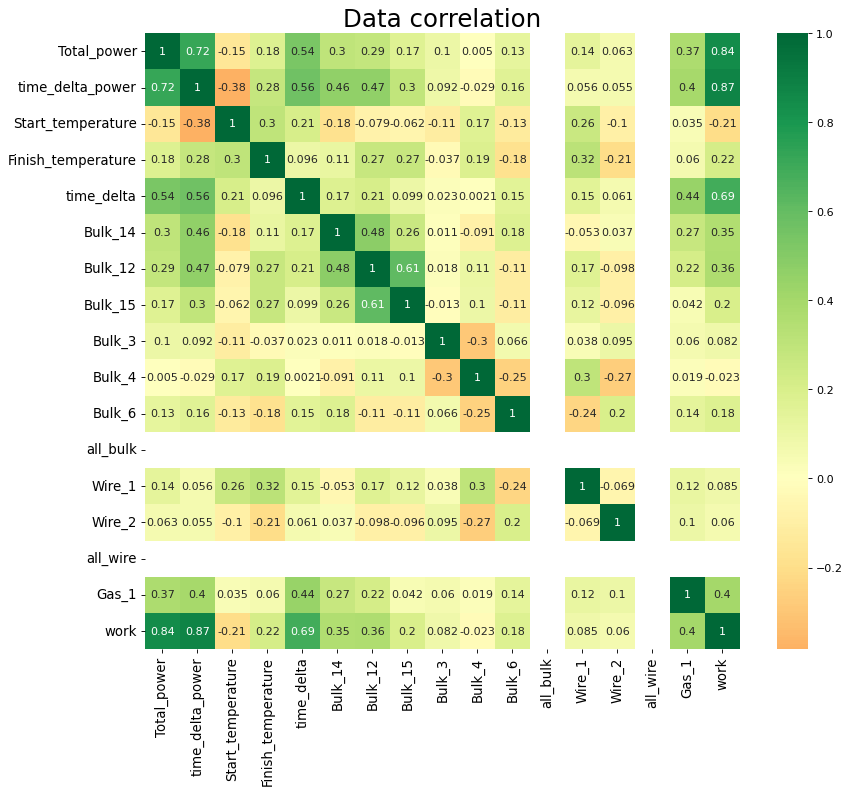

In [110]:
#build a correlation diagram
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_final.corr(), xticklabels=data_final.corr().columns,
            yticklabels=data_final.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Data correlation', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
        There is an average correlation between Bulk_12 and Bulk_15 supplements; high correlation between power and warm-up time, as well as between work and power and warm-up time.

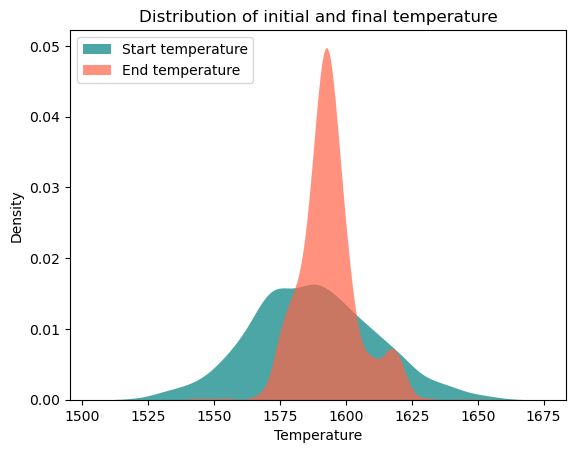

In [111]:
ax = sns.kdeplot(data_final['Start_temperature'], color='#008080', fill= True, alpha=.7, linewidth=0);
ax = sns.kdeplot(data_final['Finish_temperature'], color='#FF6347', fill= True, alpha=.7, linewidth=0);
ax.legend(["Start temperature", "End temperature"],loc='upper left')
ax.set_ylabel('Density')
ax.set_xlabel('Temperature')
ax.set_title('Distribution of initial and final temperature');


In [112]:
data_final[['Start_temperature', 'Finish_temperature']].describe()

,Start_temperature,Finish_temperature
count,2325.000000,2325.000000
mean,1587.365161,1593.366022
std,23.623144,11.209581
min,1519.000000,1541.000000
25%,1571.000000,1587.000000
50%,1587.000000,1593.000000
75%,1603.000000,1598.000000
max,1660.000000,1653.000000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
The graph shows that the average value of the initial and final temperatures does not differ much. But values close to the average are more common. Let's look at the values of the initial and final temperatures in more detail.

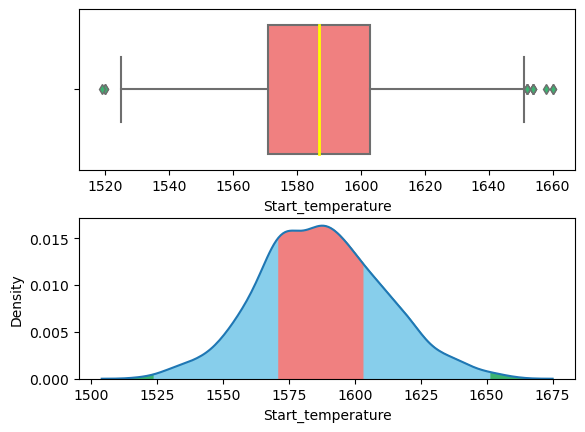

In [113]:
mean = data_final['Start_temperature'].mean()
std = data_final['Start_temperature'].std()
q1, median, q3 = np.percentile(data_final['Start_temperature'], [25, 50, 75])
iqr = q3 - q1

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False)

medianprops = dict(linestyle='-', linewidth=2, color='yellow')
sns.boxplot(x=data_final['Start_temperature'], color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.kdeplot(data_final['Start_temperature'], ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
# ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])

plt.show()

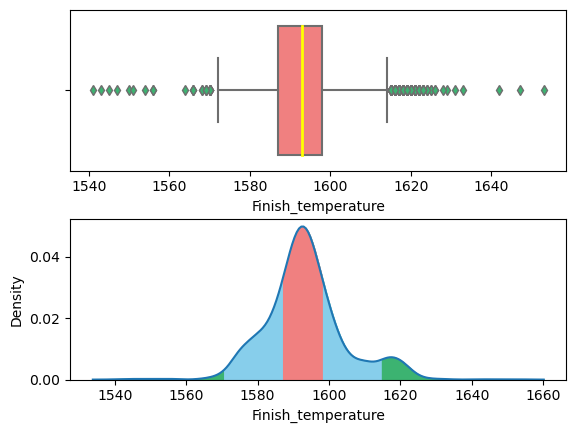

In [114]:
mean = data_final['Finish_temperature'].mean()
std = data_final['Finish_temperature'].std()
q1, median, q3 = np.percentile(data_final['Finish_temperature'], [25, 50, 75])
iqr = q3 - q1

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False)

medianprops = dict(linestyle='-', linewidth=2, color='yellow')
sns.boxplot(x=data_final['Finish_temperature'], color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.kdeplot(data_final['Finish_temperature'], ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
# ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])

plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
When looking at the detailed plots of the final temperature distribution, there are many outliers. But they should not be deleted, as we will lose more than 20% of the data.

<a id="Prepare-sample-to-train-models"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Prepare sample to train models</div>

In [417]:
X = data_final.drop('Finish_temperature', axis=1)
y = data_final['Finish_temperature']

In [418]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=50623)

In [419]:
print(f"Training sample size: {X_train.shape}")

print(f"Test sample size: {X_test.shape}")

Training sample size: (1743, 16)
Test sample size: (582, 16)


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
        <ul>
<li>The data is divided into training and test sets.</li>

</ul>
</div>

<a id="Standardization"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Standardization</div>

In [420]:
numeric_columns = ['Total_power', 'Start_temperature', 'time_delta_power',
                   'Bulk_14', 'Bulk_12', 'Bulk_15', 'Bulk_3', 'Bulk_4', 'Bulk_6', 'Wire_1',
                   'Wire_2', 'Gas_1','time_delta','work', 'all_bulk', 'all_wire']
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])
X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [421]:
X_train

,Total_power,time_delta_power,Start_temperature,time_delta,Bulk_14,Bulk_12,Bulk_15,Bulk_3,Bulk_4,Bulk_6,all_bulk,Wire_1,Wire_2,all_wire,Gas_1,work
1293,-0.817574,-0.734243,0.065046,-0.526069,-0.650645,0.287764,0.993464,0.619390,-0.617190,-0.404105,0.0,0.617540,1.110066,0.0,0.028693,-0.656498
1053,0.971764,0.455456,0.528317,0.548985,0.601960,0.975958,1.041006,-0.634637,0.709529,-0.404105,0.0,0.846117,-0.526582,0.0,0.343238,0.532483
1268,0.299130,1.563307,-1.493230,1.378532,2.247541,1.260075,1.076662,0.259191,-0.617190,3.590579,0.0,-1.302512,-0.526582,0.0,0.185966,0.743295
45,0.370965,-0.365933,-0.608803,-0.582025,-1.890971,-1.322231,-1.431158,-0.634637,-0.617190,2.636097,0.0,-0.685353,0.872008,0.0,-0.443124,-0.152189
1322,-0.275548,0.054992,-0.735150,-0.388977,0.945813,1.613643,-0.206961,0.992931,0.330466,-0.404105,0.0,0.777544,-0.526582,0.0,2.387781,-0.208168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-0.954713,-0.573473,-0.440341,-0.717718,-0.417317,0.287764,0.993464,-0.634637,-0.617190,-0.404105,0.0,-2.331111,-0.526582,0.0,-0.443124,-0.650964
2055,-2.188965,-1.862556,-0.271879,3.023637,-0.368195,-0.457253,-0.147534,-0.634637,-0.617190,0.903889,0.0,-1.508232,1.139823,0.0,-0.757669,-1.099660
1832,-0.739209,-0.351318,1.286397,-0.100804,-0.589243,-0.015293,-0.171305,-0.634637,2.208548,-0.404105,0.0,-0.159624,-0.526582,0.0,-0.285852,-0.519009
822,-1.320417,-1.497170,1.160050,-1.027574,0.356351,0.451921,-0.218847,-0.634637,1.209202,-0.404105,0.0,0.000380,-0.526582,0.0,-0.757669,-0.950987


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
        <ul>
<li>The scale of numerical features was transformed by the standardization method.</li>

</ul>
</div>

<a id="Training-models"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Training models</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">CatBoost</p>

In [422]:
%%time

parametrs_Cat = {'depth': [3, 7, 9],
                 'learning_rate': [0.03, 0.1, 0.15],
                 'iterations': [100, 200, 300]
              }

cb = cb.CatBoostRegressor(random_state=50623);

grid_search_Cat = GridSearchCV(cb, 
                           parametrs_Cat, 
                           cv = 3,  
                           n_jobs=-1);

grid_search_Cat.fit(X_train, y_train);

161:	learn: 6.1315701	total: 2.19s	remaining: 1.86s
162:	learn: 6.1201658	total: 2.21s	remaining: 1.85s
163:	learn: 6.1099758	total: 2.22s	remaining: 1.84s
164:	learn: 6.1063069	total: 2.23s	remaining: 1.82s
165:	learn: 6.0947160	total: 2.24s	remaining: 1.8s
166:	learn: 6.0827196	total: 2.25s	remaining: 1.79s
167:	learn: 6.0714058	total: 2.27s	remaining: 1.78s
168:	learn: 6.0605823	total: 2.29s	remaining: 1.78s
169:	learn: 6.0477644	total: 2.31s	remaining: 1.77s
170:	learn: 6.0301539	total: 2.32s	remaining: 1.75s
171:	learn: 6.0201094	total: 2.34s	remaining: 1.74s
172:	learn: 6.0054468	total: 2.36s	remaining: 1.73s
173:	learn: 5.9814325	total: 2.38s	remaining: 1.72s
174:	learn: 5.9698181	total: 2.39s	remaining: 1.71s
175:	learn: 5.9597001	total: 2.42s	remaining: 1.7s
176:	learn: 5.9441799	total: 2.42s	remaining: 1.69s
177:	learn: 5.9256330	total: 2.44s	remaining: 1.67s
178:	learn: 5.9105199	total: 2.46s	remaining: 1.66s
179:	learn: 5.8962303	total: 2.47s	remaining: 1.65s
180:	learn: 5.

78:	learn: 3.9809673	total: 839ms	remaining: 2.35s
79:	learn: 3.9261179	total: 850ms	remaining: 2.34s
80:	learn: 3.8844338	total: 858ms	remaining: 2.32s
81:	learn: 3.8519929	total: 867ms	remaining: 2.31s
82:	learn: 3.7933103	total: 879ms	remaining: 2.3s
83:	learn: 3.7618359	total: 887ms	remaining: 2.28s
84:	learn: 3.7497262	total: 903ms	remaining: 2.28s
85:	learn: 3.6863714	total: 913ms	remaining: 2.27s
86:	learn: 3.6590279	total: 924ms	remaining: 2.26s
87:	learn: 3.6414862	total: 931ms	remaining: 2.24s
88:	learn: 3.6100946	total: 940ms	remaining: 2.23s
89:	learn: 3.5798795	total: 947ms	remaining: 2.21s
90:	learn: 3.5610965	total: 959ms	remaining: 2.2s
91:	learn: 3.5135064	total: 967ms	remaining: 2.19s
92:	learn: 3.5031913	total: 977ms	remaining: 2.17s
93:	learn: 3.4688908	total: 986ms	remaining: 2.16s
94:	learn: 3.4625133	total: 995ms	remaining: 2.15s
95:	learn: 3.4181006	total: 1s	remaining: 2.13s
96:	learn: 3.3722812	total: 1.01s	remaining: 2.12s
97:	learn: 3.3547042	total: 1.02s	re

74:	learn: 6.8763029	total: 55.8ms	remaining: 18.6ms
75:	learn: 6.8632361	total: 56ms	remaining: 17.7ms
76:	learn: 6.8457822	total: 56.6ms	remaining: 16.9ms
77:	learn: 6.8279803	total: 57.1ms	remaining: 16.1ms
78:	learn: 6.8033244	total: 57.6ms	remaining: 15.3ms
79:	learn: 6.7913684	total: 58ms	remaining: 14.5ms
80:	learn: 6.7873477	total: 58.5ms	remaining: 13.7ms
98:	learn: 3.2282697	total: 1.27s	remaining: 1.29s
99:	learn: 3.1852747	total: 1.28s	remaining: 1.28s
100:	learn: 3.1361180	total: 1.29s	remaining: 1.26s
101:	learn: 3.1205248	total: 1.3s	remaining: 1.25s
102:	learn: 3.0959888	total: 1.31s	remaining: 1.23s
103:	learn: 3.0672430	total: 1.31s	remaining: 1.21s
104:	learn: 3.0438399	total: 1.32s	remaining: 1.2s
105:	learn: 2.9946912	total: 1.33s	remaining: 1.18s
106:	learn: 2.9791341	total: 1.34s	remaining: 1.17s
107:	learn: 2.9701133	total: 1.35s	remaining: 1.15s
108:	learn: 2.9451392	total: 1.36s	remaining: 1.14s
109:	learn: 2.9364786	total: 1.4s	remaining: 1.14s
110:	learn: 2.

92:	learn: 7.4893187	total: 55.7ms	remaining: 4.19ms
93:	learn: 7.4668149	total: 56.2ms	remaining: 3.59ms
94:	learn: 7.4505757	total: 56.7ms	remaining: 2.98ms
95:	learn: 7.4426766	total: 57.2ms	remaining: 2.38ms
96:	learn: 7.4357077	total: 57.7ms	remaining: 1.78ms
97:	learn: 7.4197068	total: 58.2ms	remaining: 1.19ms
98:	learn: 7.4008801	total: 58.7ms	remaining: 593us
99:	learn: 7.3933691	total: 59.2ms	remaining: 0us
0:	learn: 11.4133827	total: 574us	remaining: 114ms
1:	learn: 11.3464341	total: 1.1ms	remaining: 109ms
2:	learn: 11.2987597	total: 1.6ms	remaining: 105ms
3:	learn: 11.2359028	total: 2.11ms	remaining: 103ms
4:	learn: 11.1609431	total: 2.61ms	remaining: 102ms
5:	learn: 11.1103591	total: 3.12ms	remaining: 101ms
6:	learn: 11.0418208	total: 3.61ms	remaining: 99.5ms
7:	learn: 10.9724167	total: 4.11ms	remaining: 98.7ms
8:	learn: 10.9033050	total: 4.61ms	remaining: 97.8ms
9:	learn: 10.8548976	total: 5.11ms	remaining: 97.1ms
10:	learn: 10.7973856	total: 7.71ms	remaining: 133ms
11:	le

119:	learn: 8.5620360	total: 104ms	remaining: 156ms
120:	learn: 8.5553056	total: 104ms	remaining: 154ms
121:	learn: 8.5472336	total: 105ms	remaining: 153ms
122:	learn: 8.5365497	total: 105ms	remaining: 151ms
123:	learn: 8.5278983	total: 106ms	remaining: 150ms
124:	learn: 8.5251758	total: 106ms	remaining: 149ms
125:	learn: 8.5190490	total: 107ms	remaining: 147ms
126:	learn: 8.5102395	total: 107ms	remaining: 146ms
127:	learn: 8.5032552	total: 110ms	remaining: 148ms
128:	learn: 8.4988685	total: 113ms	remaining: 150ms
129:	learn: 8.4931347	total: 114ms	remaining: 150ms
130:	learn: 8.4824253	total: 115ms	remaining: 148ms
131:	learn: 8.4711986	total: 115ms	remaining: 147ms
132:	learn: 8.4672064	total: 116ms	remaining: 146ms
133:	learn: 8.4589202	total: 117ms	remaining: 145ms
134:	learn: 8.4542382	total: 117ms	remaining: 143ms
135:	learn: 8.4498090	total: 118ms	remaining: 142ms
136:	learn: 8.4482237	total: 118ms	remaining: 141ms
137:	learn: 8.4400132	total: 119ms	remaining: 140ms
138:	learn: 

222:	learn: 5.8730589	total: 158ms	remaining: 54.4ms
223:	learn: 5.8661133	total: 158ms	remaining: 53.6ms
224:	learn: 5.8612190	total: 159ms	remaining: 52.8ms
225:	learn: 5.8505617	total: 159ms	remaining: 52.1ms
226:	learn: 5.8403802	total: 160ms	remaining: 51.3ms
227:	learn: 5.8304763	total: 160ms	remaining: 50.5ms
228:	learn: 5.8212547	total: 161ms	remaining: 49.8ms
229:	learn: 5.8127076	total: 161ms	remaining: 49ms
230:	learn: 5.8018226	total: 162ms	remaining: 48.3ms
231:	learn: 5.8004431	total: 162ms	remaining: 47.6ms
232:	learn: 5.7963343	total: 163ms	remaining: 46.8ms
233:	learn: 5.7917248	total: 163ms	remaining: 46.1ms
234:	learn: 5.7879169	total: 164ms	remaining: 45.3ms
235:	learn: 5.7820762	total: 164ms	remaining: 44.6ms
236:	learn: 5.7785265	total: 165ms	remaining: 43.8ms
237:	learn: 5.7729402	total: 165ms	remaining: 43.1ms
238:	learn: 5.7661714	total: 166ms	remaining: 42.3ms
239:	learn: 5.7573121	total: 166ms	remaining: 41.6ms
240:	learn: 5.7490772	total: 167ms	remaining: 40

19:	learn: 8.7113790	total: 12.4ms	remaining: 112ms
20:	learn: 8.6713936	total: 12.9ms	remaining: 110ms
21:	learn: 8.6221868	total: 13.4ms	remaining: 109ms
22:	learn: 8.6016640	total: 13.9ms	remaining: 107ms
23:	learn: 8.5563019	total: 14.4ms	remaining: 106ms
24:	learn: 8.5062530	total: 14.9ms	remaining: 104ms
25:	learn: 8.4670248	total: 18.6ms	remaining: 124ms
26:	learn: 8.4115730	total: 19.1ms	remaining: 123ms
27:	learn: 8.3948888	total: 19.6ms	remaining: 120ms
28:	learn: 8.3495031	total: 20.1ms	remaining: 118ms
29:	learn: 8.3114359	total: 20.6ms	remaining: 117ms
30:	learn: 8.2640529	total: 21.1ms	remaining: 115ms
31:	learn: 8.2423515	total: 21.5ms	remaining: 113ms
32:	learn: 8.2082186	total: 22ms	remaining: 111ms
33:	learn: 8.1790115	total: 22.5ms	remaining: 110ms
34:	learn: 8.1632832	total: 23ms	remaining: 108ms
35:	learn: 8.1353316	total: 23.4ms	remaining: 107ms
36:	learn: 8.1129319	total: 23.9ms	remaining: 105ms
37:	learn: 8.0733886	total: 24.4ms	remaining: 104ms
38:	learn: 8.060

104:	learn: 6.6529631	total: 61.7ms	remaining: 115ms
105:	learn: 6.6399223	total: 63ms	remaining: 115ms
106:	learn: 6.6250028	total: 63.6ms	remaining: 115ms
107:	learn: 6.6228959	total: 64.1ms	remaining: 114ms
108:	learn: 6.6104823	total: 64.6ms	remaining: 113ms
109:	learn: 6.5919618	total: 65.6ms	remaining: 113ms
110:	learn: 6.5841064	total: 66.2ms	remaining: 113ms
111:	learn: 6.5742404	total: 66.7ms	remaining: 112ms
112:	learn: 6.5646443	total: 67.2ms	remaining: 111ms
113:	learn: 6.5484689	total: 67.7ms	remaining: 110ms
114:	learn: 6.5320037	total: 68.2ms	remaining: 110ms
115:	learn: 6.5240016	total: 68.7ms	remaining: 109ms
116:	learn: 6.4993667	total: 69.2ms	remaining: 108ms
117:	learn: 6.4795531	total: 69.7ms	remaining: 108ms
118:	learn: 6.4682544	total: 70.2ms	remaining: 107ms
119:	learn: 6.4563639	total: 70.7ms	remaining: 106ms
120:	learn: 6.4366736	total: 76.2ms	remaining: 113ms
121:	learn: 6.4290078	total: 76.8ms	remaining: 112ms
122:	learn: 6.4231442	total: 77.2ms	remaining: 1

14:	learn: 9.0259040	total: 8.06ms	remaining: 99.4ms
15:	learn: 8.9673049	total: 8.55ms	remaining: 98.4ms
16:	learn: 8.9192464	total: 9.05ms	remaining: 97.4ms
17:	learn: 8.8625296	total: 9.54ms	remaining: 96.5ms
18:	learn: 8.8189175	total: 10ms	remaining: 95.5ms
19:	learn: 8.7603110	total: 10.5ms	remaining: 94.6ms
20:	learn: 8.6959045	total: 11ms	remaining: 93.8ms
21:	learn: 8.6596955	total: 11.5ms	remaining: 93ms
22:	learn: 8.6466443	total: 12ms	remaining: 92.2ms
23:	learn: 8.5936392	total: 12.5ms	remaining: 91.4ms
24:	learn: 8.5195348	total: 12.9ms	remaining: 90.6ms
25:	learn: 8.4741839	total: 13.4ms	remaining: 89.9ms
26:	learn: 8.4186317	total: 13.9ms	remaining: 89.1ms
27:	learn: 8.3974325	total: 14.4ms	remaining: 88.3ms
28:	learn: 8.3612543	total: 14.9ms	remaining: 87.6ms
29:	learn: 8.3362399	total: 15.5ms	remaining: 87.7ms
30:	learn: 8.2996276	total: 16ms	remaining: 87.2ms
31:	learn: 8.2607511	total: 16.5ms	remaining: 86.6ms
32:	learn: 8.2116883	total: 17ms	remaining: 85.9ms
33:	l

90:	learn: 7.5224613	total: 54.7ms	remaining: 65.5ms
91:	learn: 7.5073954	total: 55.2ms	remaining: 64.8ms
92:	learn: 7.4893187	total: 55.7ms	remaining: 64.1ms
93:	learn: 7.4668149	total: 56.2ms	remaining: 63.4ms
94:	learn: 7.4505757	total: 56.7ms	remaining: 62.7ms
95:	learn: 7.4426766	total: 57.3ms	remaining: 62ms
96:	learn: 7.4357077	total: 57.8ms	remaining: 61.3ms
97:	learn: 7.4197068	total: 58.3ms	remaining: 60.7ms
98:	learn: 7.4008801	total: 58.8ms	remaining: 60ms
99:	learn: 7.3933691	total: 62.3ms	remaining: 62.3ms
100:	learn: 7.3847219	total: 62.8ms	remaining: 61.6ms
101:	learn: 7.3787077	total: 63.3ms	remaining: 60.9ms
102:	learn: 7.3618913	total: 63.9ms	remaining: 60.1ms
103:	learn: 7.3421644	total: 64.4ms	remaining: 59.5ms
104:	learn: 7.3256142	total: 64.9ms	remaining: 58.7ms
105:	learn: 7.3205096	total: 65.4ms	remaining: 58ms
106:	learn: 7.3007185	total: 66ms	remaining: 57.3ms
107:	learn: 7.2939855	total: 66.5ms	remaining: 56.6ms
108:	learn: 7.2830928	total: 67ms	remaining: 5

234:	learn: 6.1271924	total: 170ms	remaining: 47.1ms
235:	learn: 6.1192344	total: 171ms	remaining: 46.3ms
236:	learn: 6.1169346	total: 171ms	remaining: 45.5ms
237:	learn: 6.1163002	total: 172ms	remaining: 44.7ms
238:	learn: 6.1070761	total: 172ms	remaining: 43.9ms
239:	learn: 6.0983562	total: 173ms	remaining: 43.1ms
240:	learn: 6.0933508	total: 173ms	remaining: 42.4ms
241:	learn: 6.0846418	total: 174ms	remaining: 41.6ms
242:	learn: 6.0790563	total: 174ms	remaining: 40.8ms
243:	learn: 6.0706309	total: 174ms	remaining: 40ms
244:	learn: 6.0693327	total: 175ms	remaining: 39.3ms
245:	learn: 6.0645184	total: 175ms	remaining: 38.5ms
246:	learn: 6.0618062	total: 176ms	remaining: 37.7ms
247:	learn: 6.0570357	total: 176ms	remaining: 37ms
248:	learn: 6.0524575	total: 178ms	remaining: 36.4ms
249:	learn: 6.0519169	total: 181ms	remaining: 36.2ms
250:	learn: 6.0362267	total: 183ms	remaining: 35.8ms
251:	learn: 6.0258344	total: 184ms	remaining: 35ms
252:	learn: 6.0185279	total: 184ms	remaining: 34.2ms

213:	learn: 5.3249520	total: 150ms	remaining: 60.2ms
214:	learn: 5.3212707	total: 150ms	remaining: 59.4ms
215:	learn: 5.3090828	total: 151ms	remaining: 58.7ms
216:	learn: 5.3018233	total: 151ms	remaining: 57.9ms
217:	learn: 5.2953366	total: 152ms	remaining: 57.1ms
218:	learn: 5.2860243	total: 152ms	remaining: 56.3ms
219:	learn: 5.2834741	total: 153ms	remaining: 55.6ms
220:	learn: 5.2721175	total: 153ms	remaining: 54.8ms
221:	learn: 5.2712007	total: 154ms	remaining: 54.1ms
222:	learn: 5.2618325	total: 154ms	remaining: 53.3ms
223:	learn: 5.2547245	total: 155ms	remaining: 52.6ms
224:	learn: 5.2471895	total: 157ms	remaining: 52.4ms
225:	learn: 5.2439637	total: 159ms	remaining: 51.9ms
226:	learn: 5.2378628	total: 160ms	remaining: 51.4ms
227:	learn: 5.2366523	total: 161ms	remaining: 50.8ms
228:	learn: 5.2308153	total: 161ms	remaining: 50.1ms
229:	learn: 5.2258086	total: 162ms	remaining: 49.3ms
230:	learn: 5.2205744	total: 162ms	remaining: 48.5ms
231:	learn: 5.2096394	total: 163ms	remaining: 

26:	learn: 7.0708464	total: 125ms	remaining: 337ms
27:	learn: 6.9874330	total: 127ms	remaining: 327ms
28:	learn: 6.9256520	total: 130ms	remaining: 319ms
29:	learn: 6.8818469	total: 133ms	remaining: 310ms
30:	learn: 6.8345223	total: 136ms	remaining: 303ms
31:	learn: 6.7854666	total: 139ms	remaining: 295ms
32:	learn: 6.7435280	total: 142ms	remaining: 288ms
33:	learn: 6.6981348	total: 144ms	remaining: 280ms
34:	learn: 6.6598636	total: 147ms	remaining: 273ms
35:	learn: 6.6162608	total: 152ms	remaining: 270ms
36:	learn: 6.5914359	total: 155ms	remaining: 264ms
37:	learn: 6.5635623	total: 158ms	remaining: 257ms
38:	learn: 6.4895871	total: 164ms	remaining: 256ms
39:	learn: 6.4445923	total: 167ms	remaining: 251ms
40:	learn: 6.3958955	total: 188ms	remaining: 271ms
41:	learn: 6.3583010	total: 191ms	remaining: 264ms
42:	learn: 6.3417739	total: 194ms	remaining: 257ms
43:	learn: 6.2967328	total: 218ms	remaining: 277ms
44:	learn: 6.2528654	total: 221ms	remaining: 270ms
45:	learn: 6.2076022	total: 224

5:	learn: 10.3230586	total: 32.7ms	remaining: 1.6s
6:	learn: 10.2550298	total: 35ms	remaining: 1.47s
7:	learn: 10.1798300	total: 38.3ms	remaining: 1.4s
8:	learn: 10.1179422	total: 41.3ms	remaining: 1.34s
9:	learn: 10.0648206	total: 44.5ms	remaining: 1.29s
10:	learn: 9.9938017	total: 47.2ms	remaining: 1.24s
11:	learn: 9.9305574	total: 50.6ms	remaining: 1.22s
12:	learn: 9.8669754	total: 54.3ms	remaining: 1.2s
13:	learn: 9.8003416	total: 57.3ms	remaining: 1.17s
14:	learn: 9.7303704	total: 59.7ms	remaining: 1.13s
15:	learn: 9.6693078	total: 62.9ms	remaining: 1.12s
16:	learn: 9.6181151	total: 66.6ms	remaining: 1.11s
17:	learn: 9.5593670	total: 72.3ms	remaining: 1.13s
18:	learn: 9.5071937	total: 80ms	remaining: 1.18s
19:	learn: 9.4551528	total: 86.6ms	remaining: 1.21s
20:	learn: 9.3996246	total: 90.1ms	remaining: 1.2s
21:	learn: 9.3516867	total: 93.3ms	remaining: 1.18s
22:	learn: 9.3024551	total: 96.7ms	remaining: 1.16s
23:	learn: 9.2520962	total: 100ms	remaining: 1.15s
24:	learn: 9.2053336	

137:	learn: 4.6453402	total: 528ms	remaining: 620ms
138:	learn: 4.6194162	total: 531ms	remaining: 615ms
139:	learn: 4.6037933	total: 534ms	remaining: 610ms
140:	learn: 4.5968177	total: 537ms	remaining: 605ms
141:	learn: 4.5874404	total: 542ms	remaining: 603ms
142:	learn: 4.5780279	total: 545ms	remaining: 598ms
143:	learn: 4.5758478	total: 548ms	remaining: 593ms
144:	learn: 4.5421336	total: 550ms	remaining: 588ms
145:	learn: 4.5182790	total: 553ms	remaining: 583ms
146:	learn: 4.4976314	total: 555ms	remaining: 578ms
147:	learn: 4.4813176	total: 558ms	remaining: 573ms
148:	learn: 4.4784629	total: 561ms	remaining: 569ms
149:	learn: 4.4698426	total: 564ms	remaining: 564ms
150:	learn: 4.4606792	total: 571ms	remaining: 563ms
151:	learn: 4.4460486	total: 574ms	remaining: 559ms
152:	learn: 4.4329246	total: 577ms	remaining: 554ms
153:	learn: 4.4298616	total: 579ms	remaining: 549ms
154:	learn: 4.4152989	total: 582ms	remaining: 544ms
155:	learn: 4.3938279	total: 585ms	remaining: 540ms
156:	learn: 

144:	learn: 7.0714282	total: 533ms	remaining: 202ms
145:	learn: 7.0613328	total: 536ms	remaining: 198ms
146:	learn: 7.0447153	total: 539ms	remaining: 194ms
147:	learn: 7.0380044	total: 541ms	remaining: 190ms
148:	learn: 7.0204792	total: 543ms	remaining: 186ms
149:	learn: 7.0114885	total: 546ms	remaining: 182ms
150:	learn: 6.9932918	total: 549ms	remaining: 178ms
151:	learn: 6.9846107	total: 551ms	remaining: 174ms
152:	learn: 6.9755679	total: 554ms	remaining: 170ms
153:	learn: 6.9681948	total: 559ms	remaining: 167ms
154:	learn: 6.9582339	total: 562ms	remaining: 163ms
155:	learn: 6.9506903	total: 566ms	remaining: 160ms
156:	learn: 6.9437076	total: 568ms	remaining: 156ms
157:	learn: 6.9347561	total: 571ms	remaining: 152ms
158:	learn: 6.9182236	total: 574ms	remaining: 148ms
159:	learn: 6.9127789	total: 577ms	remaining: 144ms
160:	learn: 6.8999966	total: 579ms	remaining: 140ms
161:	learn: 6.8961030	total: 582ms	remaining: 137ms
162:	learn: 6.8855867	total: 587ms	remaining: 133ms
163:	learn: 

243:	learn: 3.1326383	total: 904ms	remaining: 207ms
244:	learn: 3.1207691	total: 910ms	remaining: 204ms
245:	learn: 3.1114703	total: 918ms	remaining: 202ms
246:	learn: 3.0992644	total: 921ms	remaining: 198ms
247:	learn: 3.0929327	total: 931ms	remaining: 195ms
248:	learn: 3.0802608	total: 935ms	remaining: 192ms
249:	learn: 3.0714107	total: 938ms	remaining: 188ms
250:	learn: 3.0586880	total: 941ms	remaining: 184ms
251:	learn: 3.0371557	total: 946ms	remaining: 180ms
252:	learn: 3.0348352	total: 949ms	remaining: 176ms
253:	learn: 3.0342878	total: 952ms	remaining: 172ms
254:	learn: 3.0200251	total: 955ms	remaining: 168ms
255:	learn: 3.0107153	total: 957ms	remaining: 164ms
256:	learn: 3.0099640	total: 960ms	remaining: 161ms
257:	learn: 2.9979055	total: 963ms	remaining: 157ms
258:	learn: 2.9872899	total: 971ms	remaining: 154ms
259:	learn: 2.9797284	total: 974ms	remaining: 150ms
260:	learn: 2.9659927	total: 977ms	remaining: 146ms
261:	learn: 2.9540105	total: 979ms	remaining: 142ms
262:	learn: 

21:	learn: 9.8638916	total: 109ms	remaining: 1.37s
22:	learn: 9.8203152	total: 112ms	remaining: 1.35s
23:	learn: 9.7716762	total: 115ms	remaining: 1.33s
24:	learn: 9.7116888	total: 119ms	remaining: 1.31s
25:	learn: 9.6546711	total: 122ms	remaining: 1.29s
26:	learn: 9.6154516	total: 125ms	remaining: 1.27s
27:	learn: 9.5608712	total: 129ms	remaining: 1.25s
28:	learn: 9.5136881	total: 134ms	remaining: 1.25s
29:	learn: 9.4665646	total: 137ms	remaining: 1.23s
30:	learn: 9.4216460	total: 140ms	remaining: 1.22s
31:	learn: 9.3754140	total: 143ms	remaining: 1.2s
32:	learn: 9.3296812	total: 146ms	remaining: 1.18s
33:	learn: 9.2878954	total: 149ms	remaining: 1.17s
34:	learn: 9.2402551	total: 152ms	remaining: 1.15s
35:	learn: 9.2003033	total: 155ms	remaining: 1.14s
36:	learn: 9.1575769	total: 160ms	remaining: 1.14s
37:	learn: 9.1232818	total: 164ms	remaining: 1.13s
38:	learn: 9.0838176	total: 169ms	remaining: 1.13s
39:	learn: 9.0555869	total: 177ms	remaining: 1.15s
40:	learn: 9.0202298	total: 180m

133:	learn: 3.6788490	total: 543ms	remaining: 267ms
134:	learn: 3.6468532	total: 545ms	remaining: 263ms
135:	learn: 3.6206377	total: 549ms	remaining: 258ms
136:	learn: 3.6041945	total: 552ms	remaining: 254ms
137:	learn: 3.5859265	total: 555ms	remaining: 249ms
138:	learn: 3.5584612	total: 558ms	remaining: 245ms
139:	learn: 3.5481199	total: 560ms	remaining: 240ms
140:	learn: 3.5328172	total: 565ms	remaining: 236ms
141:	learn: 3.5130678	total: 568ms	remaining: 232ms
142:	learn: 3.5000582	total: 570ms	remaining: 227ms
143:	learn: 3.4813166	total: 573ms	remaining: 223ms
144:	learn: 3.4642963	total: 578ms	remaining: 219ms
145:	learn: 3.4523459	total: 581ms	remaining: 215ms
146:	learn: 3.4422170	total: 583ms	remaining: 210ms
147:	learn: 3.4285265	total: 586ms	remaining: 206ms
148:	learn: 3.4232362	total: 589ms	remaining: 202ms
149:	learn: 3.4042083	total: 592ms	remaining: 197ms
150:	learn: 3.3983245	total: 595ms	remaining: 193ms
151:	learn: 3.3961743	total: 598ms	remaining: 189ms
152:	learn: 

153:	learn: 3.2568111	total: 678ms	remaining: 643ms
154:	learn: 3.2393592	total: 682ms	remaining: 638ms
155:	learn: 3.2199601	total: 685ms	remaining: 633ms
156:	learn: 3.2036632	total: 688ms	remaining: 627ms
157:	learn: 3.1981868	total: 691ms	remaining: 621ms
158:	learn: 3.1799806	total: 694ms	remaining: 615ms
159:	learn: 3.1572040	total: 697ms	remaining: 610ms
160:	learn: 3.1285705	total: 699ms	remaining: 603ms
161:	learn: 3.1081804	total: 702ms	remaining: 598ms
162:	learn: 3.0963071	total: 704ms	remaining: 592ms
163:	learn: 3.0794334	total: 713ms	remaining: 591ms
164:	learn: 3.0600212	total: 721ms	remaining: 590ms
165:	learn: 3.0419980	total: 759ms	remaining: 612ms
166:	learn: 3.0268428	total: 777ms	remaining: 619ms
167:	learn: 3.0100223	total: 795ms	remaining: 625ms
168:	learn: 3.0091904	total: 827ms	remaining: 641ms
169:	learn: 2.9840109	total: 847ms	remaining: 648ms
170:	learn: 2.9698203	total: 871ms	remaining: 657ms
171:	learn: 2.9573718	total: 881ms	remaining: 656ms
172:	learn: 

60:	learn: 7.8554367	total: 745ms	remaining: 476ms
61:	learn: 7.8243441	total: 753ms	remaining: 462ms
62:	learn: 7.8088664	total: 754ms	remaining: 443ms
63:	learn: 7.7812486	total: 760ms	remaining: 428ms
64:	learn: 7.7502384	total: 772ms	remaining: 416ms
65:	learn: 7.7206889	total: 781ms	remaining: 402ms
66:	learn: 7.6945672	total: 796ms	remaining: 392ms
67:	learn: 7.6629868	total: 812ms	remaining: 382ms
68:	learn: 7.6388988	total: 821ms	remaining: 369ms
69:	learn: 7.6077219	total: 838ms	remaining: 359ms
70:	learn: 7.5777103	total: 846ms	remaining: 346ms
71:	learn: 7.5503778	total: 858ms	remaining: 334ms
72:	learn: 7.5243758	total: 867ms	remaining: 321ms
73:	learn: 7.4994813	total: 876ms	remaining: 308ms
74:	learn: 7.4706408	total: 892ms	remaining: 297ms
75:	learn: 7.4356396	total: 907ms	remaining: 286ms
76:	learn: 7.4122013	total: 928ms	remaining: 277ms
77:	learn: 7.3871324	total: 937ms	remaining: 264ms
78:	learn: 7.3541737	total: 945ms	remaining: 251ms
79:	learn: 7.3266046	total: 954

25:	learn: 6.4344626	total: 294ms	remaining: 838ms
26:	learn: 6.3657079	total: 313ms	remaining: 846ms
27:	learn: 6.2911700	total: 320ms	remaining: 824ms
28:	learn: 6.2226639	total: 331ms	remaining: 811ms
29:	learn: 6.1399810	total: 339ms	remaining: 791ms
30:	learn: 6.0446192	total: 361ms	remaining: 804ms
31:	learn: 5.9646569	total: 381ms	remaining: 809ms
32:	learn: 5.8931399	total: 392ms	remaining: 796ms
33:	learn: 5.8203642	total: 406ms	remaining: 788ms
34:	learn: 5.7532188	total: 423ms	remaining: 785ms
35:	learn: 5.6911314	total: 431ms	remaining: 767ms
36:	learn: 5.6465350	total: 442ms	remaining: 752ms
37:	learn: 5.5829493	total: 452ms	remaining: 737ms
38:	learn: 5.5174264	total: 460ms	remaining: 720ms
39:	learn: 5.4588468	total: 470ms	remaining: 704ms
40:	learn: 5.4007522	total: 490ms	remaining: 705ms
41:	learn: 5.3331836	total: 511ms	remaining: 706ms
42:	learn: 5.2920229	total: 541ms	remaining: 718ms
43:	learn: 5.2507535	total: 551ms	remaining: 701ms
44:	learn: 5.1983320	total: 555

259:	learn: 3.1636951	total: 1.3s	remaining: 200ms
260:	learn: 3.1626137	total: 1.3s	remaining: 195ms
261:	learn: 3.1411815	total: 1.31s	remaining: 189ms
262:	learn: 3.1373178	total: 1.32s	remaining: 186ms
263:	learn: 3.1279477	total: 1.33s	remaining: 182ms
264:	learn: 3.1203957	total: 1.33s	remaining: 176ms
265:	learn: 3.1075965	total: 1.34s	remaining: 171ms
266:	learn: 3.0997155	total: 1.35s	remaining: 166ms
267:	learn: 3.0880030	total: 1.35s	remaining: 161ms
268:	learn: 3.0751435	total: 1.36s	remaining: 157ms
269:	learn: 3.0667089	total: 1.36s	remaining: 151ms
270:	learn: 3.0617735	total: 1.37s	remaining: 146ms
271:	learn: 3.0578839	total: 1.37s	remaining: 141ms
272:	learn: 3.0509828	total: 1.37s	remaining: 136ms
273:	learn: 3.0457202	total: 1.38s	remaining: 131ms
274:	learn: 3.0414037	total: 1.38s	remaining: 125ms
275:	learn: 3.0325753	total: 1.38s	remaining: 120ms
276:	learn: 3.0191054	total: 1.38s	remaining: 115ms
277:	learn: 3.0118710	total: 1.39s	remaining: 110ms
278:	learn: 3.

46:	learn: 6.1886287	total: 683ms	remaining: 770ms
47:	learn: 6.1439188	total: 691ms	remaining: 749ms
48:	learn: 6.0922991	total: 705ms	remaining: 733ms
49:	learn: 6.0687445	total: 719ms	remaining: 719ms
50:	learn: 6.0194861	total: 731ms	remaining: 702ms
51:	learn: 5.9767957	total: 747ms	remaining: 689ms
52:	learn: 5.9486589	total: 759ms	remaining: 673ms
53:	learn: 5.9130406	total: 779ms	remaining: 663ms
54:	learn: 5.8628351	total: 795ms	remaining: 651ms
55:	learn: 5.8269847	total: 808ms	remaining: 634ms
56:	learn: 5.7862402	total: 819ms	remaining: 618ms
57:	learn: 5.7478900	total: 828ms	remaining: 600ms
58:	learn: 5.7300044	total: 839ms	remaining: 583ms
59:	learn: 5.6929553	total: 850ms	remaining: 567ms
60:	learn: 5.6652605	total: 869ms	remaining: 556ms
61:	learn: 5.6382151	total: 878ms	remaining: 538ms
62:	learn: 5.6037212	total: 893ms	remaining: 524ms
63:	learn: 5.5674323	total: 912ms	remaining: 513ms
64:	learn: 5.5171837	total: 927ms	remaining: 499ms
65:	learn: 5.4814868	total: 940

169:	learn: 2.8885332	total: 2.2s	remaining: 388ms
170:	learn: 2.8779321	total: 2.21s	remaining: 375ms
171:	learn: 2.8497386	total: 2.22s	remaining: 362ms
172:	learn: 2.8345381	total: 2.23s	remaining: 348ms
173:	learn: 2.8148946	total: 2.24s	remaining: 335ms
174:	learn: 2.7953630	total: 2.25s	remaining: 322ms
175:	learn: 2.7799799	total: 2.27s	remaining: 309ms
176:	learn: 2.7563069	total: 2.29s	remaining: 298ms
177:	learn: 2.7447054	total: 2.3s	remaining: 285ms
178:	learn: 2.7295692	total: 2.33s	remaining: 273ms
179:	learn: 2.7181402	total: 2.33s	remaining: 259ms
180:	learn: 2.7071403	total: 2.35s	remaining: 246ms
181:	learn: 2.6863678	total: 2.36s	remaining: 234ms
182:	learn: 2.6719778	total: 2.38s	remaining: 221ms
183:	learn: 2.6565627	total: 2.39s	remaining: 208ms
184:	learn: 2.6502290	total: 2.4s	remaining: 195ms
185:	learn: 2.6366605	total: 2.41s	remaining: 181ms
186:	learn: 2.6233520	total: 2.42s	remaining: 168ms
187:	learn: 2.6112436	total: 2.44s	remaining: 156ms
188:	learn: 2.6

177:	learn: 5.7245832	total: 2.42s	remaining: 300ms
178:	learn: 5.7065907	total: 2.43s	remaining: 285ms
179:	learn: 5.6872471	total: 2.45s	remaining: 272ms
180:	learn: 5.6726597	total: 2.45s	remaining: 258ms
181:	learn: 5.6604571	total: 2.46s	remaining: 244ms
182:	learn: 5.6475519	total: 2.47s	remaining: 230ms
183:	learn: 5.6372539	total: 2.48s	remaining: 216ms
184:	learn: 5.6244748	total: 2.49s	remaining: 202ms
185:	learn: 5.6162755	total: 2.5s	remaining: 188ms
186:	learn: 5.5995942	total: 2.52s	remaining: 175ms
187:	learn: 5.5916500	total: 2.53s	remaining: 162ms
188:	learn: 5.5749745	total: 2.54s	remaining: 148ms
189:	learn: 5.5636141	total: 2.56s	remaining: 135ms
190:	learn: 5.5492338	total: 2.57s	remaining: 121ms
191:	learn: 5.5395303	total: 2.58s	remaining: 108ms
192:	learn: 5.5333451	total: 2.59s	remaining: 94.1ms
193:	learn: 5.5195855	total: 2.6s	remaining: 80.5ms
194:	learn: 5.5095448	total: 2.61s	remaining: 67ms
195:	learn: 5.4973321	total: 2.62s	remaining: 53.5ms
196:	learn: 

0:	learn: 10.9586655	total: 747us	remaining: 223ms
1:	learn: 10.7520368	total: 1.23ms	remaining: 184ms
2:	learn: 10.6363160	total: 1.72ms	remaining: 170ms
3:	learn: 10.4739755	total: 2.12ms	remaining: 157ms
4:	learn: 10.3342929	total: 2.47ms	remaining: 146ms
5:	learn: 10.2233687	total: 2.86ms	remaining: 140ms
6:	learn: 10.0598902	total: 3.23ms	remaining: 135ms
7:	learn: 9.9242553	total: 3.57ms	remaining: 130ms
8:	learn: 9.7981581	total: 3.96ms	remaining: 128ms
9:	learn: 9.7119356	total: 4.29ms	remaining: 124ms
10:	learn: 9.6141115	total: 4.63ms	remaining: 122ms
11:	learn: 9.5339747	total: 5.04ms	remaining: 121ms
12:	learn: 9.4849006	total: 5.42ms	remaining: 120ms
13:	learn: 9.4153605	total: 5.88ms	remaining: 120ms
14:	learn: 9.3478182	total: 6.22ms	remaining: 118ms
15:	learn: 9.2927585	total: 6.55ms	remaining: 116ms
16:	learn: 9.2500830	total: 6.94ms	remaining: 116ms
17:	learn: 9.2064393	total: 7.29ms	remaining: 114ms
18:	learn: 9.1291438	total: 7.64ms	remaining: 113ms
19:	learn: 9.073

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fde48152bb0>,
             n_jobs=-1,
             param_grid={'depth': [3, 7, 9], 'iterations': [100, 200, 300],
                         'learning_rate': [0.03, 0.1, 0.15]})

In [423]:
grid_search_Cat.best_params_

{'depth': 3, 'iterations': 300, 'learning_rate': 0.1}

In [424]:
cat_best_score = grid_search_Cat.best_score_

In [425]:
cb = CatBoostRegressor(random_state=50623, iterations=300, learning_rate=0.1, depth=3)
cb.fit(X_train, y_train)

0:	learn: 10.9586655	total: 1.23ms	remaining: 368ms
1:	learn: 10.7520368	total: 1.79ms	remaining: 267ms
2:	learn: 10.6363160	total: 2.17ms	remaining: 215ms
3:	learn: 10.4739755	total: 2.53ms	remaining: 187ms
4:	learn: 10.3342929	total: 2.9ms	remaining: 171ms
5:	learn: 10.2233687	total: 3.29ms	remaining: 161ms
6:	learn: 10.0598902	total: 3.69ms	remaining: 154ms
7:	learn: 9.9242553	total: 4.16ms	remaining: 152ms
8:	learn: 9.7981581	total: 4.6ms	remaining: 149ms
9:	learn: 9.7119356	total: 5.03ms	remaining: 146ms
10:	learn: 9.6141115	total: 5.38ms	remaining: 141ms
11:	learn: 9.5339747	total: 5.8ms	remaining: 139ms
12:	learn: 9.4849006	total: 6.27ms	remaining: 138ms
13:	learn: 9.4153605	total: 6.67ms	remaining: 136ms
14:	learn: 9.3478182	total: 7.17ms	remaining: 136ms
15:	learn: 9.2927585	total: 7.54ms	remaining: 134ms
16:	learn: 9.2500830	total: 8.13ms	remaining: 135ms
17:	learn: 9.2064393	total: 8.55ms	remaining: 134ms
18:	learn: 9.1291438	total: 8.95ms	remaining: 132ms
19:	learn: 9.07337

In [426]:
cb.feature_importances_

array([ 1.32714428, 23.39328811, 27.83578254, 11.47696096,  3.59873437,
        4.51303644,  5.19519234,  0.55647172,  0.53944115,  6.39805804,
        0.        ,  6.48103361,  3.21655003,  0.        ,  1.12991232,
        4.33839408])

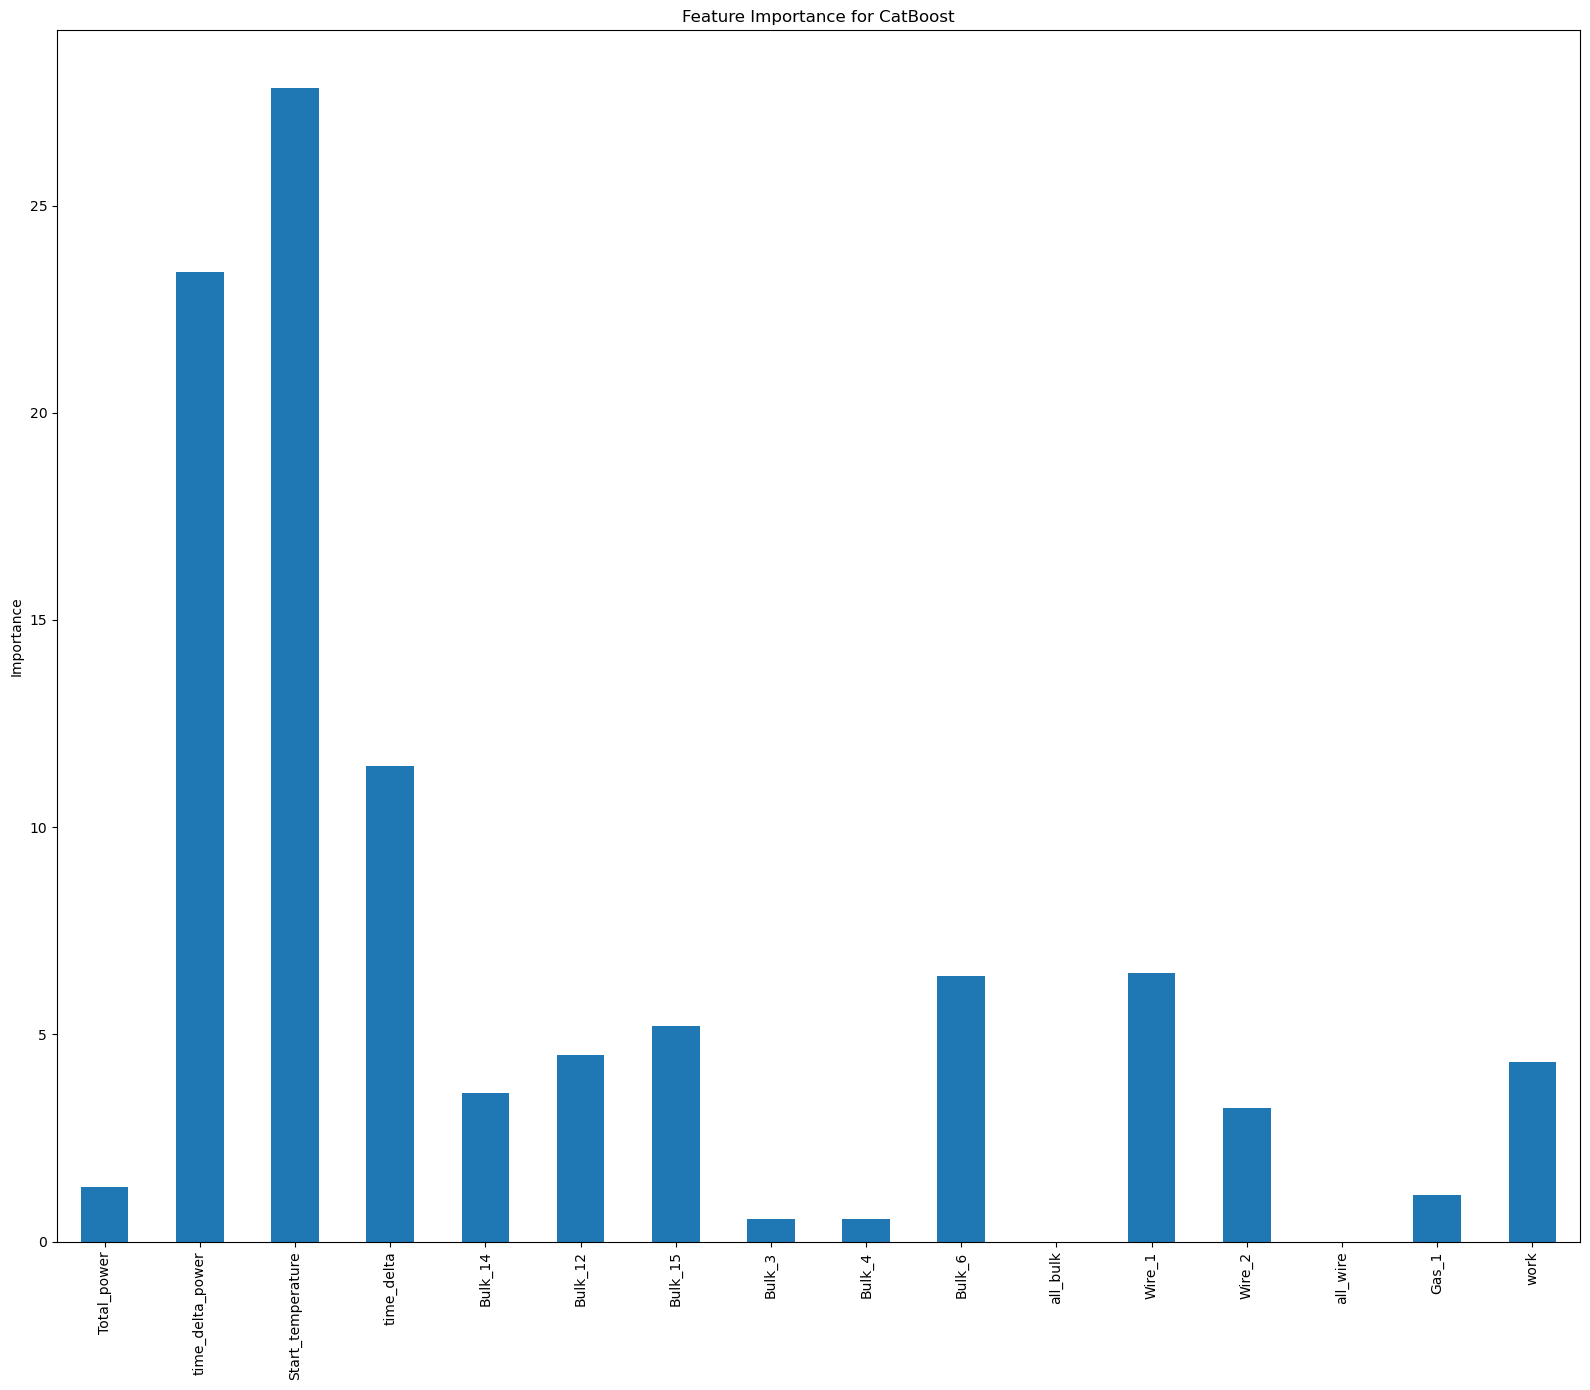

In [427]:
features_imp_cat = pd.Series(cb.feature_importances_, X_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
features_imp_cat.plot.bar(ax=ax)
ax.set_title("Feature Importance for CatBoost")
ax.set_ylabel('Importance')
fig.tight_layout()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">XGBoost</p>

In [428]:
%%time

parametrs_xgb = {'max_depth': [10,35,80],
                 'learning_rate': [0.03, 0.1, 0.15]
              }

xgb = XGBRegressor(random_state=50623)

grid_search_xgb = GridSearchCV(xgb, 
                           parametrs_xgb, 
                           cv = 3,  
                           n_jobs=-1);

grid_search_xgb.fit(X_train, y_train);

CPU times: user 2.7 s, sys: 637 ms, total: 3.33 s
Wall time: 2.02 s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [429]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

In [430]:
XGB_best_score = grid_search_xgb.best_score_

In [431]:
%%time
xgb = XGBRegressor(random_state=50623, learning_rate=0.1, max_depth=10)
xgb.fit(X_train, y_train)

CPU times: user 2.24 s, sys: 531 ms, total: 2.77 s
Wall time: 565 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=50623, ...)

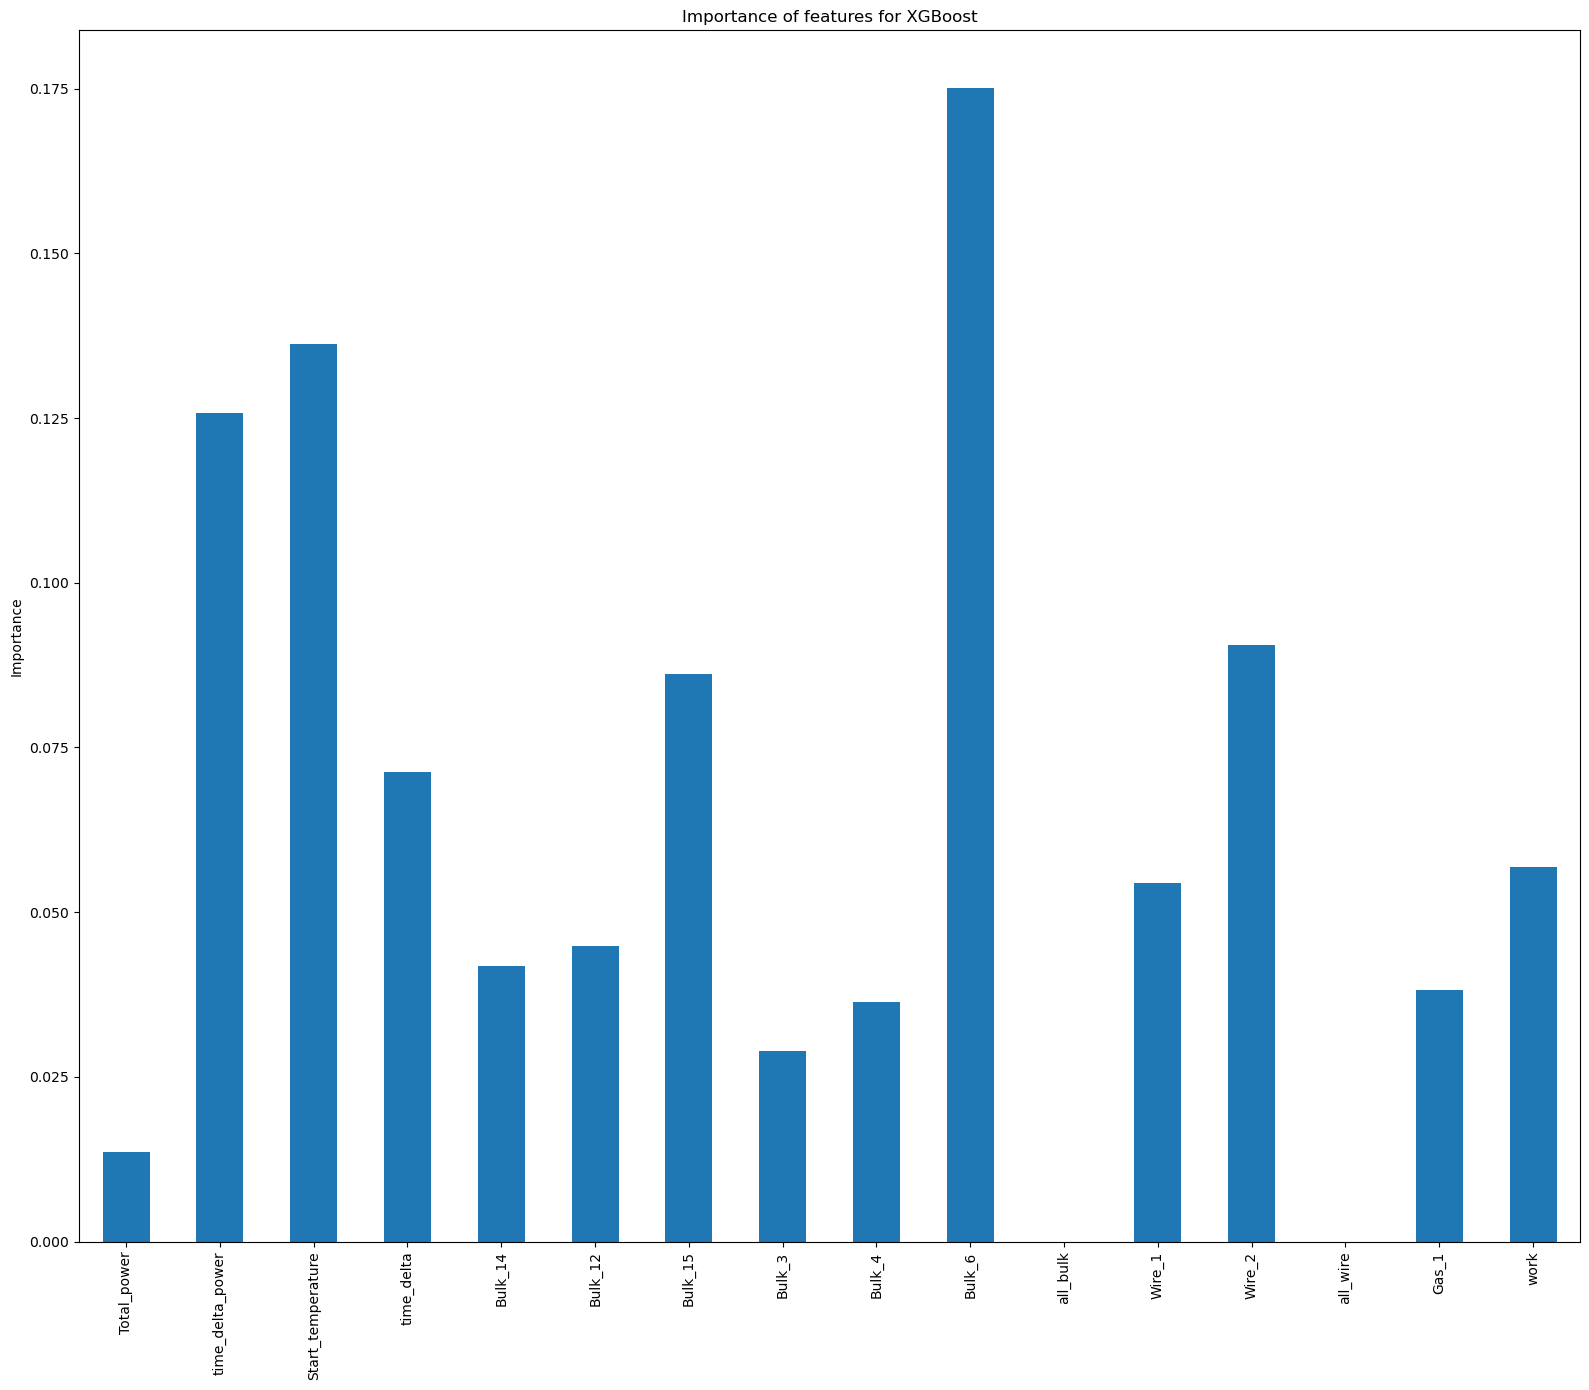

In [432]:
features_imp_xgb = pd.Series(xgb.feature_importances_, X_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
features_imp_xgb.plot.bar(ax=ax)
ax.set_title("Importance of features for XGBoost")
ax.set_ylabel('Importance')
fig.tight_layout()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LightGBM</p>

In [433]:
%%time
param_light = {'learning_rate': [0.1, 0.3, 0.5, 0.7],
               'max_depth': [15, 20, 30, 35],
              }

lgbm = LGBMRegressor(random_state = 50623)

# initialize GridSearchCV
grid_search_lgbm = GridSearchCV(estimator = lgbm, 
                           param_grid = param_light, 
                           cv = 3,
                           n_jobs = -1
                           );
grid_search_lgbm.fit(X_train, y_train);

CPU times: user 3.24 s, sys: 908 ms, total: 4.15 s
Wall time: 1.57 s


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=50623), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'max_depth': [15, 20, 30, 35]})

In [434]:
grid_search_lgbm.best_params_

{'learning_rate': 0.1, 'max_depth': 20}

In [435]:
LGBM_best_score = grid_search_lgbm.best_score_

In [436]:
lgbm = LGBMRegressor(random_state = 50623, learning_rate=0.1, max_depth=20)
lgbm.fit(X_train, y_train);

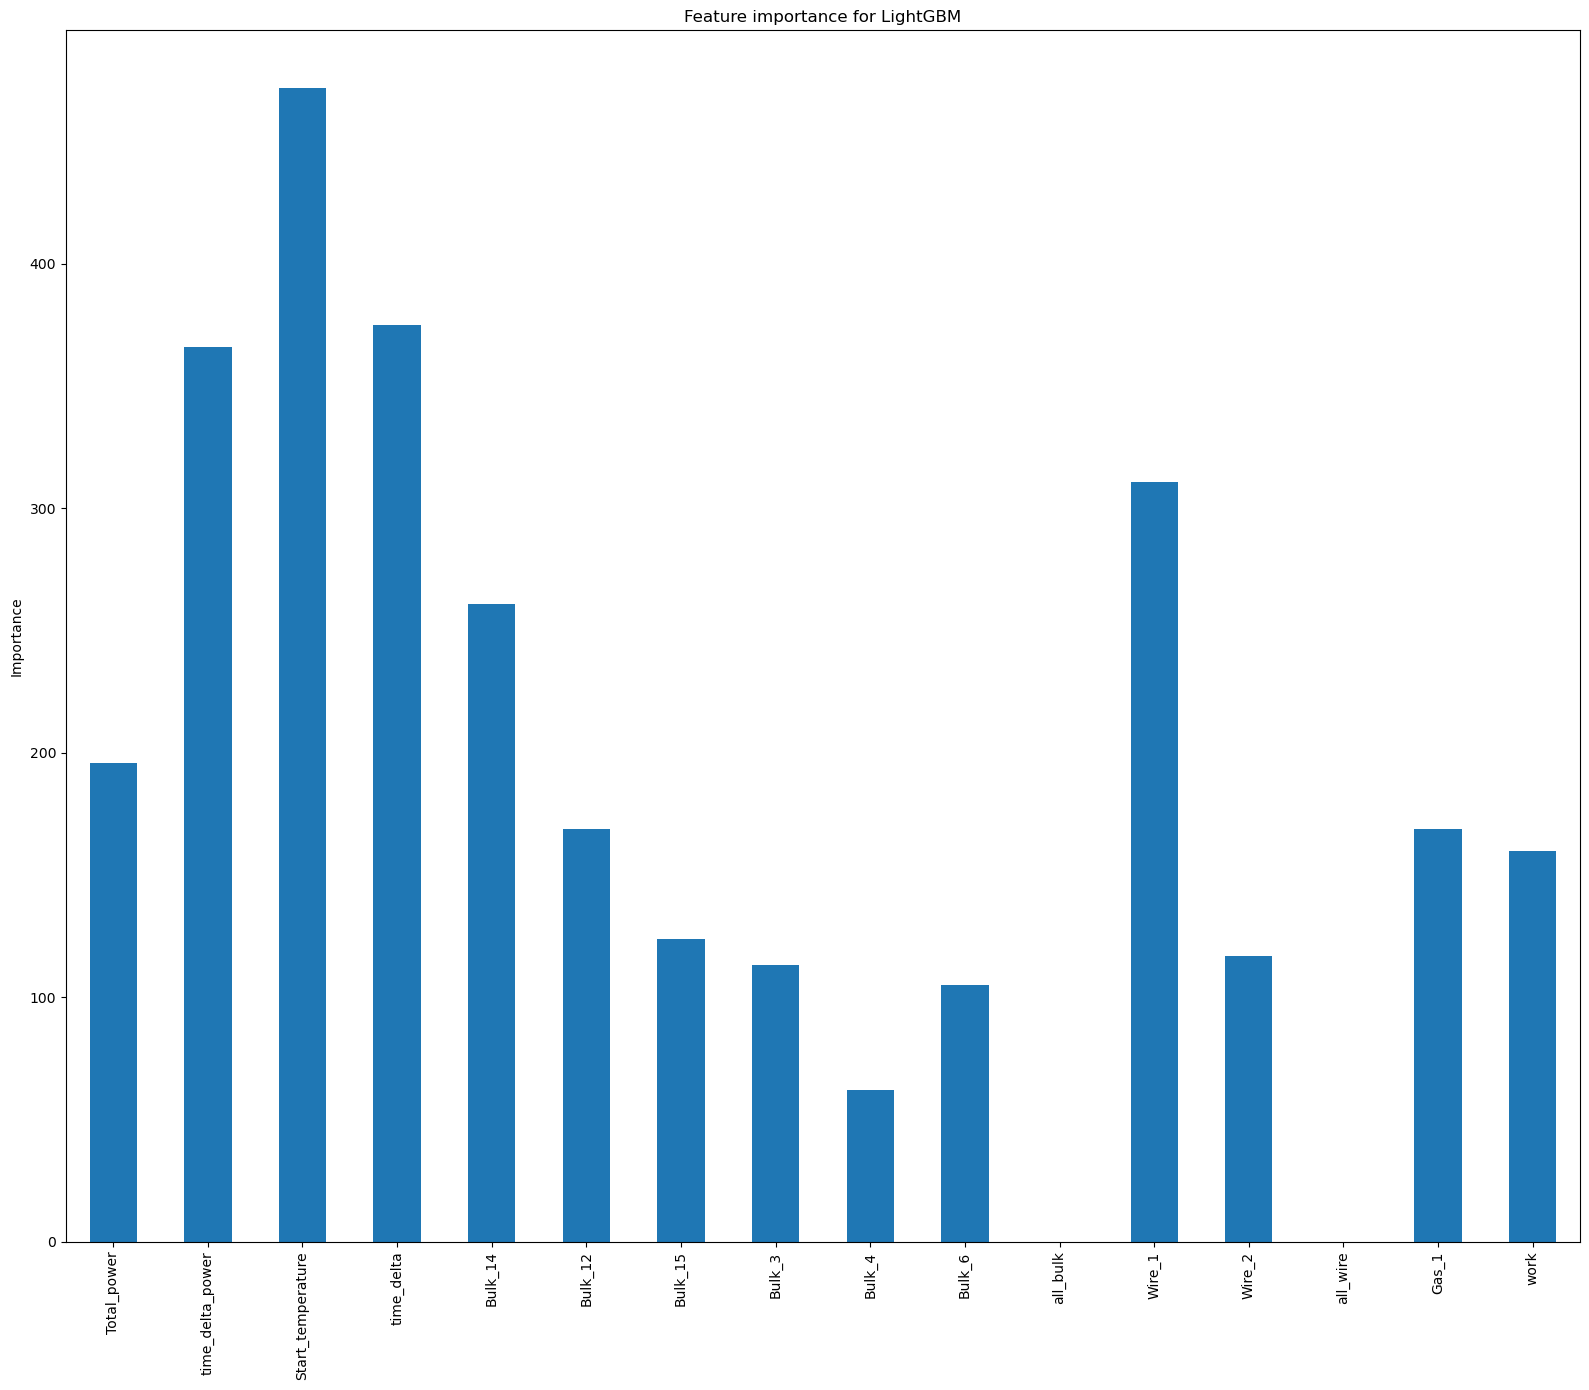

In [437]:
features_imp_lgbm = pd.Series(lgbm.feature_importances_, X_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
features_imp_lgbm.plot.bar(ax=ax)
ax.set_title("Feature importance for LightGBM")
ax.set_ylabel('Importance')
fig.tight_layout()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">DecisionTree</p>

In [438]:
%%time
parametrs_DT = {'max_depth': [15, 35]}

DT = DecisionTreeRegressor(random_state=50623)

# initialize GridSearchCV
grid_search_DT = GridSearchCV(DT, 
                           parametrs_DT, 
                           scoring='neg_mean_squared_error', 
                           cv=2
                          )
grid_search_DT.fit(X_train, y_train)


CPU times: user 128 ms, sys: 55.1 ms, total: 183 ms
Wall time: 48.8 ms


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=50623),
             param_grid={'max_depth': [15, 35]},
             scoring='neg_mean_squared_error')

In [439]:
grid_search_DT.best_params_

{'max_depth': 15}

In [440]:
DT_best_score = grid_search_DT.best_score_

In [441]:
DT = DecisionTreeRegressor(random_state=50623, max_depth=15)
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=50623)

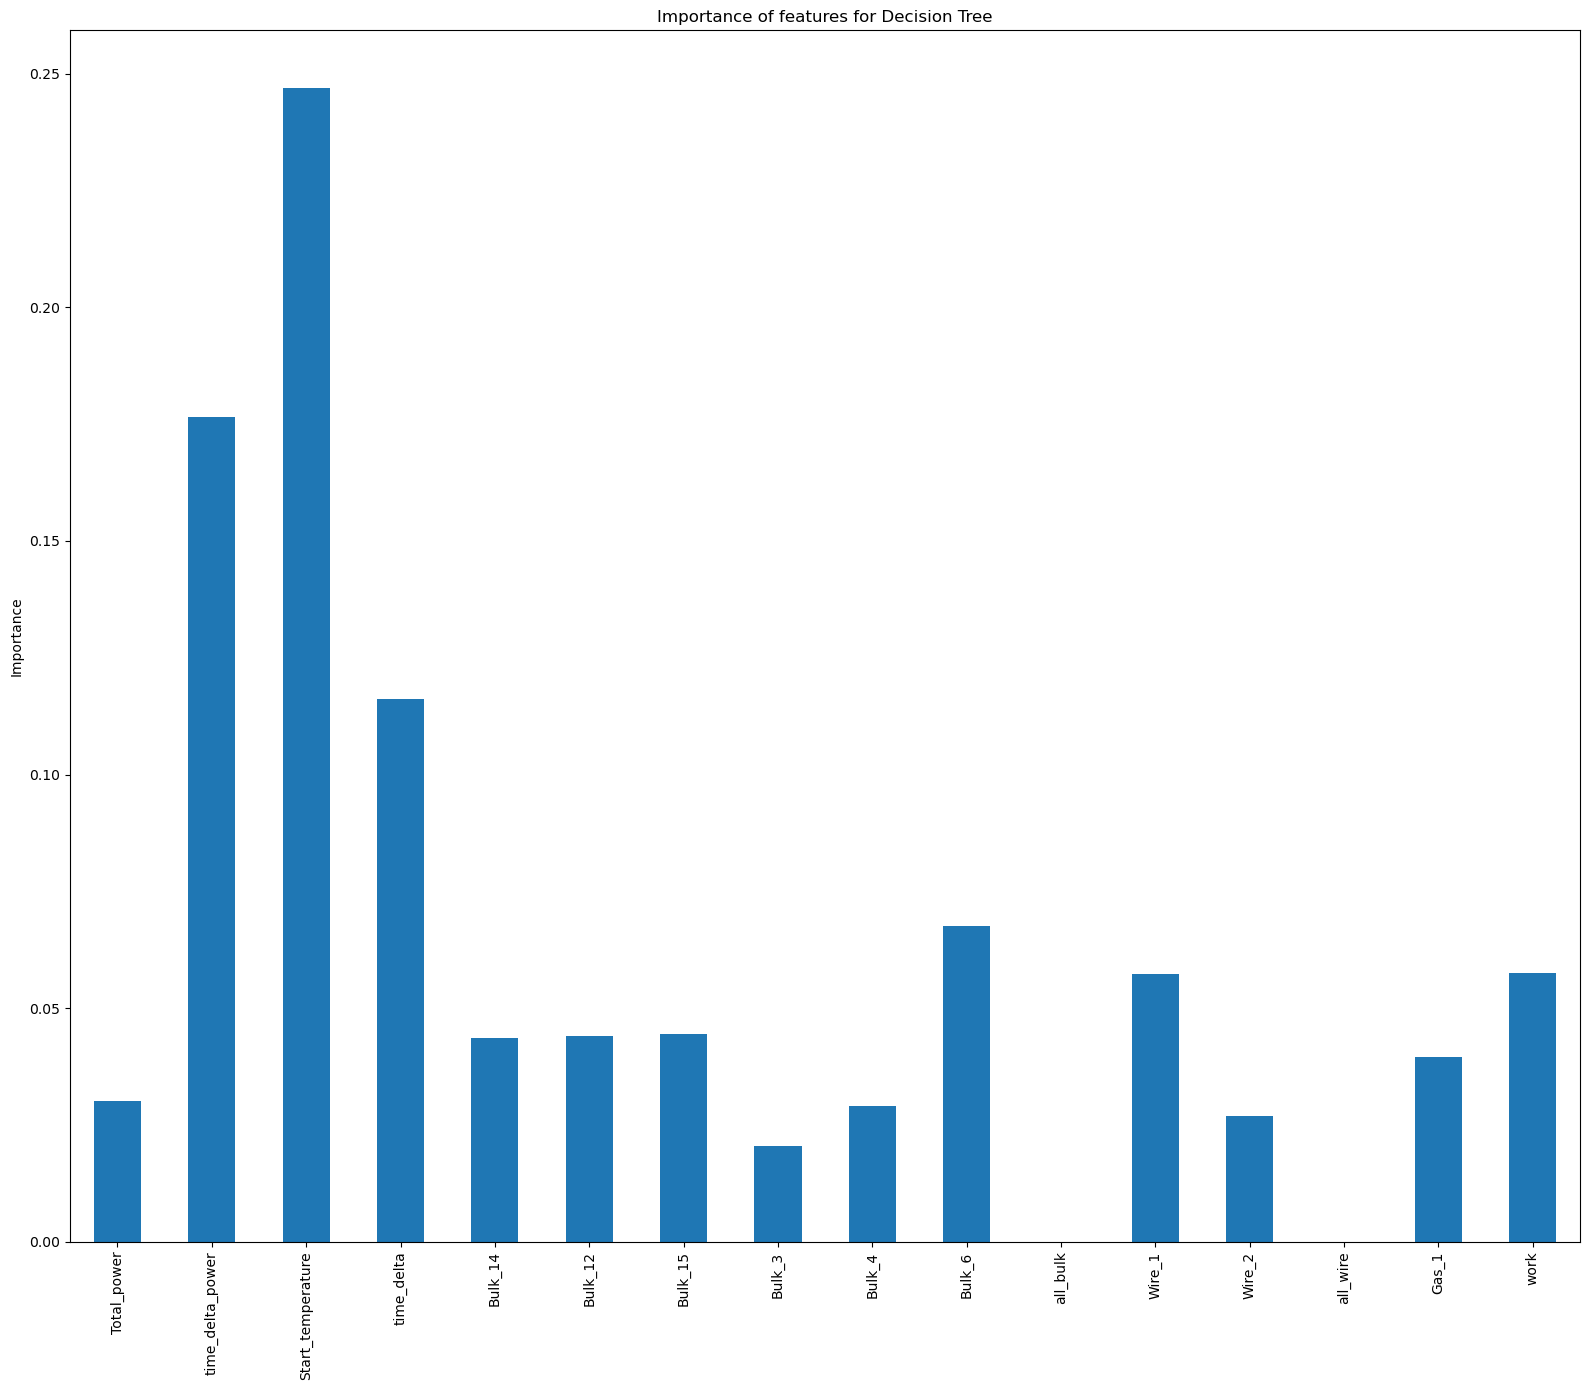

In [442]:
features_imp_DT = pd.Series(DT.feature_importances_, X_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
features_imp_DT.plot.bar(ax=ax)
ax.set_title("Importance of features for Decision Tree")
ax.set_ylabel('Importance')
fig.tight_layout()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">RandomForest</p>

In [443]:
%%time
parametrs_RF = {'max_depth': [35, 80, 100],
                'n_estimators': [80, 100, 200]}

RF = RandomForestRegressor(random_state=50623)

# initialize GridSearchCV
grid_search_RF = GridSearchCV(RF, 
                           parametrs_RF, 
                           scoring='neg_mean_squared_error', 
                           cv=2
                          )
grid_search_RF.fit(X_train, y_train)

CPU times: user 10.5 s, sys: 261 ms, total: 10.8 s
Wall time: 10.5 s


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=50623),
             param_grid={'max_depth': [35, 80, 100],
                         'n_estimators': [80, 100, 200]},
             scoring='neg_mean_squared_error')

In [444]:
grid_search_RF.best_params_

{'max_depth': 35, 'n_estimators': 100}

In [445]:
RF_best_score = grid_search_RF.best_score_

In [446]:
RF = RandomForestRegressor(random_state=50623, n_estimators=100, max_depth = 35)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, random_state=50623)

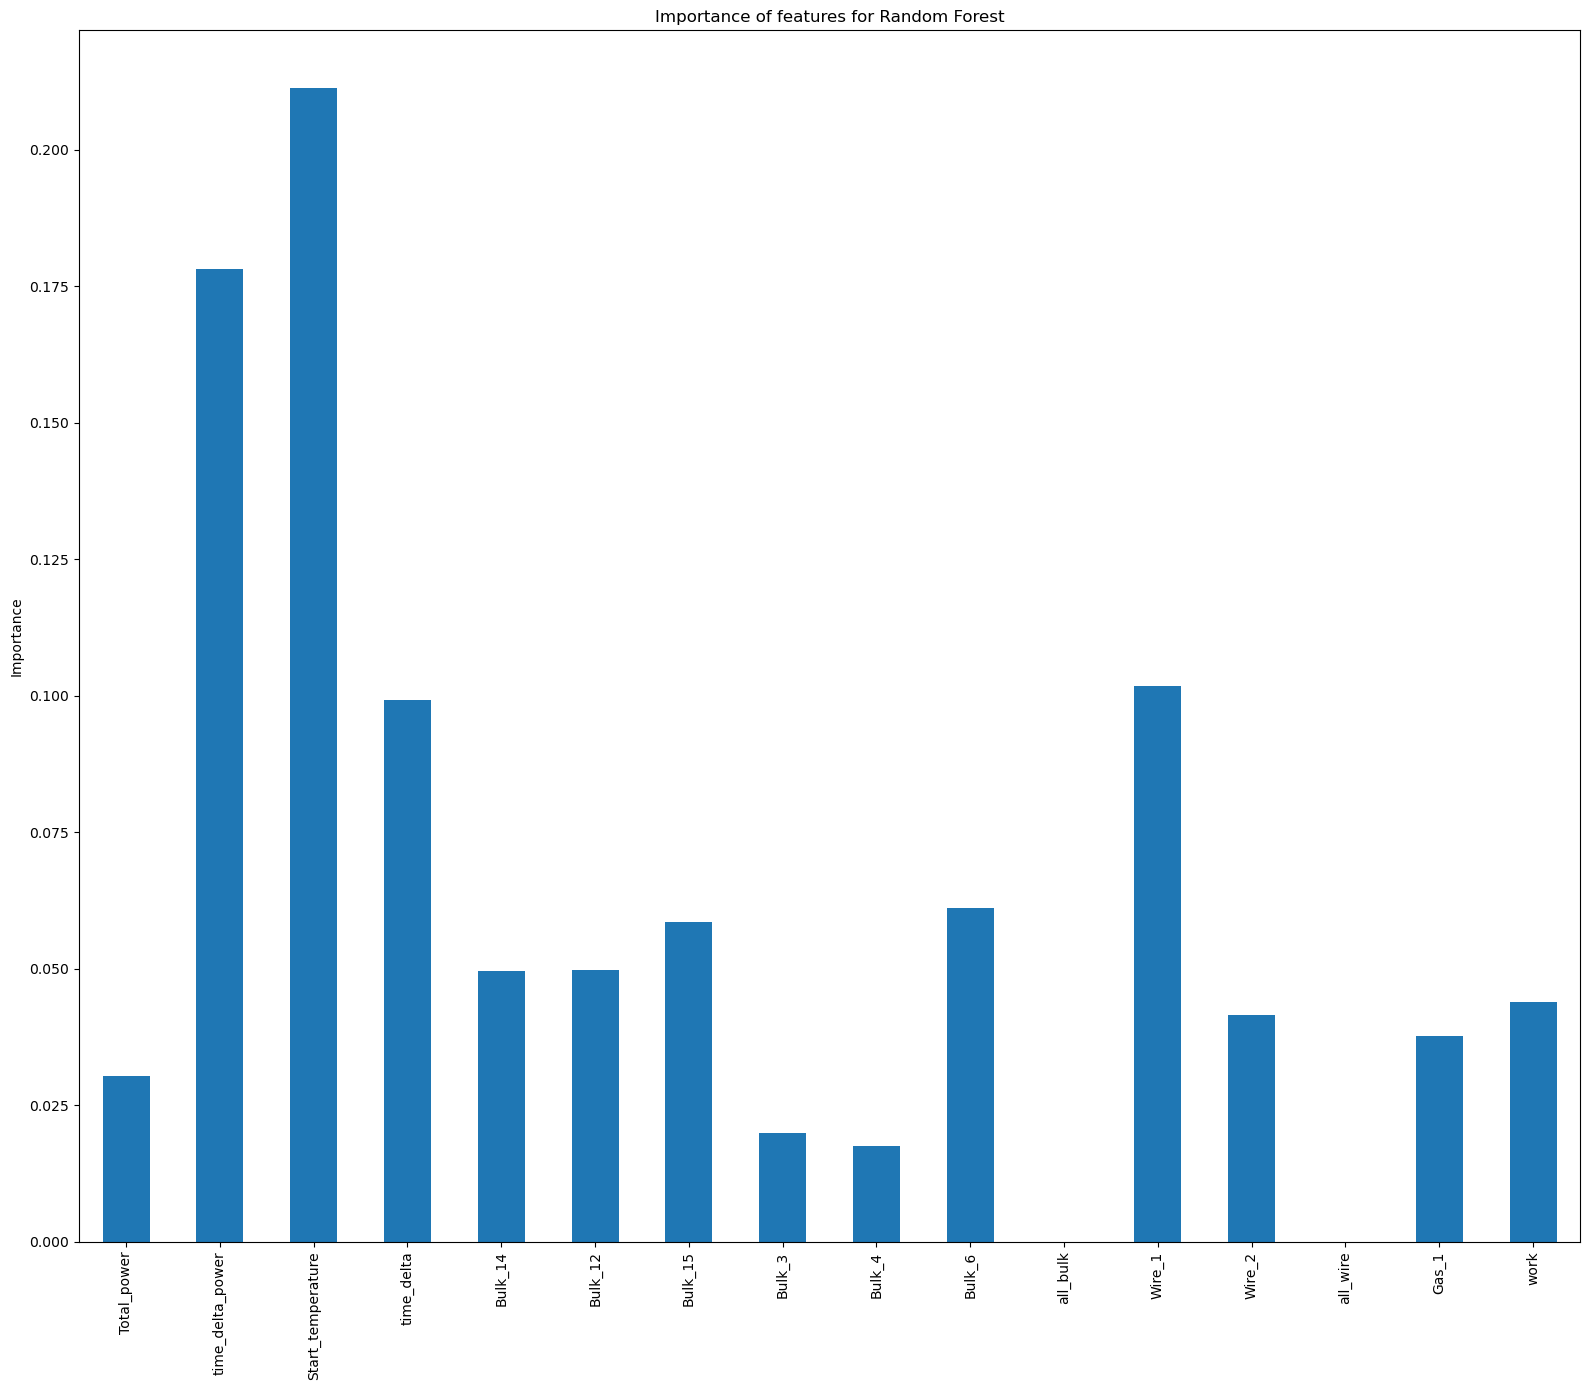

In [447]:
features_imp_RF = pd.Series(RF.feature_importances_, X_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
features_imp_RF.plot.bar(ax=ax)
ax.set_title("Importance of features for Random Forest")
ax.set_ylabel('Importance')
fig.tight_layout()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LinearRegression</p>

In [448]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [449]:
LR_best_score = cross_val_score(LR,X_train, y_train, 
                         cv = 3, 
                         n_jobs = -1, 
                         scoring = 'neg_mean_squared_error').mean()

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
        <ul>
<li>Linear regression, random forest, decision tree, XGBoost, CatBoost, LightGBM models were trained.</li>
<li>Found the best hyperparameters for the respective models using GridSearchCV.</li>
<li>The graphs above show that on the selected data, the models behave in a similar way and select the same features as the most important ones: "key", "Start_temperature", "Wire_1".</li>             
</ul>
</div>

<a id="Model-comparison"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Model comparison</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Evaluation of the quality of the studied models using best_score
</p>

In [450]:
data_best_score = {'Models':['XGBoost','LightGBM','CatBoost', 'Decision Tree', 'Random Forest','Linear Regresion'],
     'best_score': [XGB_best_score, LGBM_best_score, cat_best_score, DT_best_score, RF_best_score, LR_best_score]}
df_best_score=pd.DataFrame(data_best_score)
print(tabulate(df_best_score, headers='keys', tablefmt='psql'))

+----+------------------+--------------+
|    | Models           |   best_score |
|----+------------------+--------------|
|  0 | XGBoost          |     0.397254 |
|  1 | LightGBM         |     0.432696 |
|  2 | CatBoost         |     0.471762 |
|  3 | Decision Tree    |  -150.798    |
|  4 | Random Forest    |   -71.4627   |
|  5 | Linear Regresion |   -65.1206   |
+----+------------------+--------------+


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Decision Tree has the lowest best_score. CatBoost has the highest.

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
        <ul>
<li>Research suggests that the best CatBoost model. </li>
<li>The second line of the best model is occupied by LightGBM. </li>
<li>Decision Tree, Random Forest and Linear Regression is the worst model.</li>          
</ul>
</div>

<a id="Best-model-testing"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Best model testing</div>

In [451]:
cb = CatBoostRegressor(random_state=50623, iterations=300, learning_rate=0.1, depth=3)
cb.fit(X_train, y_train)
pred = cb.predict(X_test)

0:	learn: 10.9586655	total: 622us	remaining: 186ms
1:	learn: 10.7520368	total: 1.25ms	remaining: 186ms
2:	learn: 10.6363160	total: 1.77ms	remaining: 175ms
3:	learn: 10.4739755	total: 2.21ms	remaining: 164ms
4:	learn: 10.3342929	total: 2.57ms	remaining: 152ms
5:	learn: 10.2233687	total: 2.94ms	remaining: 144ms
6:	learn: 10.0598902	total: 3.35ms	remaining: 140ms
7:	learn: 9.9242553	total: 3.8ms	remaining: 139ms
8:	learn: 9.7981581	total: 4.22ms	remaining: 136ms
9:	learn: 9.7119356	total: 4.6ms	remaining: 133ms
10:	learn: 9.6141115	total: 5.05ms	remaining: 133ms
11:	learn: 9.5339747	total: 5.89ms	remaining: 141ms
12:	learn: 9.4849006	total: 6.29ms	remaining: 139ms
13:	learn: 9.4153605	total: 6.65ms	remaining: 136ms
14:	learn: 9.3478182	total: 7.18ms	remaining: 137ms
15:	learn: 9.2927585	total: 7.66ms	remaining: 136ms
16:	learn: 9.2500830	total: 8.15ms	remaining: 136ms
17:	learn: 9.2064393	total: 8.84ms	remaining: 139ms
18:	learn: 9.1291438	total: 9.23ms	remaining: 137ms
19:	learn: 9.07337

In [452]:
mae_final = mean_absolute_error(y_test, pred)
print('MAE on the test set: ', mae_final)

MAE on the test set:  5.885864575037306


<a id="Conclusion"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Conclusion</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<br>📑An exploratory data analysis was done to explore the data. Input data - historical data of the metallurgical plant LLC "So we temper steel". After exploratory data analysis, the following changes were obtained:
        
        
<br><b> Input data - historical data of the metallurgical plant "Tak Temper Steel".</b>
An exploratory data analysis was carried out to examine the data. Input data - historical data of the metallurgical plant LLC "So we temper steel". After exploratory data analysis, the following changes were obtained:
         <ul>
      <li>The names of columns and data type have been changed in tables.</li>
      <li>Uninformative data removed.</li>
      <li>It appears from the analysis that Bulk_12 additive and Wire_1 wire additive are used in large quantities.</li>
      <li>The table with additives and wire additives contains gaps.</li>
        </ul>
        
<br> 📊 The data was pre-processed as follows: the names of the columns were corrected; empty lines are filled; data in columns changed; some columns are removed because they are not informative; added column with full power.
 
<br> 📊 Data standardization has been carried out.
        
<br> 📊 Linear regression, random forest, decision tree, XGBoost, CatBoost, LightGBM models were trained.
        
<br> 📊 Found the best hyperparameters for the respective models using GridSearchCV.
    
<br> 📊 The studied models behave in a similar way and select the same features as the most important, such as "key", "Start_temperature", "Wire_1".
    
<br> 📊 Comparison of the quality of the studied models using best_score is shown.
 
<br>Based on the analysis, the conclusion is made:
<br> <b>- the best CatBoost model, then LightGBM, after XGBoost.</b>
<br> <b>- the worst model of Linear Regresion, Random Forest and Decision Tree</b>, they have the lowest best_score.